### Student Name

Mathieu Ruch

An Bui Duc Khanh

This aim of this course is to review the evolution of image processing tools from hand-crafted methods to deep learning algorithms. The semester is split into four labs :

* **Lab 1** : Introduction to Image Processing Using Hand-Crafted Features
* **Lab 2** : Object detection
* **Lab 3** : Object tracking
* **Lab 4** : Introduction to Deep Learning for image classification and generative model

Let's start with the third chapter of this course!

# Chapter 3 : Object Tracking 
(100 pts)

In [1]:

import cv2 as cv
import numpy as np
import os
import math
import tarfile
import time as _time
from utils import *
import matplotlib.pyplot as plt
%matplotlib inline


## 1 Video Processing and Detection. 

In this first part of chapter 3, you will be asked to construct a series of functions tools to handle video processing and basic detection. You will use the same HOG+SVM classifier from Chapter 2 and adapt it to handle video input.

In contrast to the previous assignments, we will not provide a guided skeleton of the function. You will use any high level (already implemented) function from OpenCV to complete the exercise specifications and outputs. In addition, you will be asked to search in the documentation (or your favourite reference) the specific usage of the functions. 

__Section Objectives:__

* Construct a Video processing pipeline.
* Use OpenCV functions on the video frames for human detection.
* Analyse and compare tracking methodes proposed by OpenCV

__Data__:

The folder ``../data/videos`` contains three sample videos to test your functions.


### 1.1 Reading/Writing video (5 pts)

A video file can be abstracted as a bunch of images of the same dimensions in order (*i.e. collection*). 

**QUESTION**

Your first task is to complete the function `transform_video_file(...)` which will operate on every frames of a given video file. The following steps are required:

- Open video file with OpenCV
- Iterate overall frames or a subset of them (based on `n_frame` parameter)
- Apply the processing function. The function's signature needs to be `function(np.array, Any) -> Any`

To read videos you can use the OpenCV build-in functions, namely `cv::VideoCapture` class. More informations is available in the [docs](https://docs.opencv.org/3.4.4/d8/dfe/classcv_1_1VideoCapture.html#a473055e77dd7faa4d26d686226b292c1).


In [2]:
def transform_video_file(file_path, function, params=None, n_frame=-1):
    """
    Given the path of a video file (file_path) the function reads every frame of the input video and applies a given
    transformation (function) using the parameters (params)

    :input_image:       Input video file path 
    :function:          Function be applied to each frame of the image. Signature `function(np.array, Any) -> Any`
    :params:            Any parameter needed for the function above.
    :n_frame:           Maxiumum number of frame to read. Default `-1`, read all the content
    :return:            output_handler this can be anything you may need to save your results.
    """
    output_handler = []
    # Open video
    cap = cv.VideoCapture(file_path)
    if cap.isOpened():
        
        
        
        # Read first frame
        ret, frame = cap.read()
        frame_count = 0
        # Process 
        while ret:
            
            transformed_frame = function(frame, params)
            output_handler.append(transformed_frame)
            frame_count += 1
            # Break loop if maximum number of frames is reached
            if n_frame > 0 and frame_count >= n_frame:
                break
            ret, frame = cap.read()
    else:
        raise ValueError('Can not open file: {}'.format(file_path))
    cap.release()
    return output_handler

### 1.2 Example

The example below shows how the `transform_video_file` can be used. It will open the video named `speaker.avi` and process only the first **2** frames.

In [3]:
# Example of usage:
def dummy_function(image, params):
    if('dummy_function' in params[0]):
        print('Func: "{}", Message "{}", File: "{}"'.format(params[0], params[1], params[2]))
        print('Image dims: {}'.format(image.shape))
    return 'I did it'
    
# Define parameters
file_name = '../data/videos/speaker.avi'
extra_params = ['dummy_function', 'Hello from the video file', file_name];

# Process single frame
transform_video_file(file_path=file_name, function=dummy_function, params=extra_params, n_frame=2)

Func: "dummy_function", Message "Hello from the video file", File: "../data/videos/speaker.avi"
Image dims: (720, 1280, 3)
Func: "dummy_function", Message "Hello from the video file", File: "../data/videos/speaker.avi"
Image dims: (720, 1280, 3)


['I did it', 'I did it']

### 1.3 Testing your function (5 pts)

To test your function you need to process the video: ``../data/videos/video_gym.avi``. 

**QUESTION**

At each frame, you will count the number of __red__ pixels. At the end you should return two outputs:

* The __frame number__ with the maximum number of red pixels
* The __image__ frame with more red pixels. You are asked to display the original frame with the red pixels **replaced** by their grayscale value.

Display the image and the frame number. 

__Hint__: Check the first assignment if you have no idea what am I talking about.  

Frame with the red pixels REPLACED by their grayscale value:


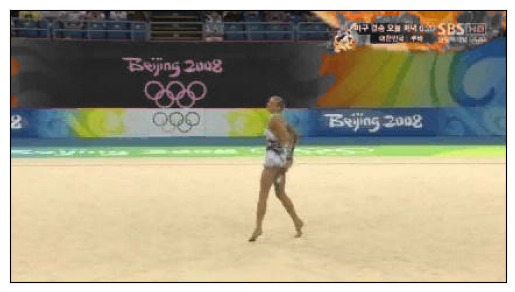

In [4]:
# Frame processing function
def processing_fn(image, params):
    """
    Count the number of red pixels in a given image. This function also extracts the region where the pixels are red
    in form of a mask.
    
    :param image:  Frame to analyse
    :param params: Extra parameters that my be required by the functions
    """
    # YOUR CODE HERE
    
    #################################
    hsv_img = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    lower1, upper1, lower2, upper2 = params[0][0], params[0][1], params[1][0], params[1][1]
    lower_mask = cv.inRange(hsv_img, lower1, upper1)
    upper_mask = cv.inRange(hsv_img, lower2, upper2)
    mask = lower_mask + upper_mask
    nb_red_pix = np.sum(mask == 255)
    

    #################################
    
    # Done
    return (nb_red_pix, mask) # Magic structure with the number of red pixels + mask


# Video file
file_path   =  os.path.join('..','data', 'videos', 'video_gym.avi')

# Find and display frame with max number of red pixels
# YOUR CODE HERE
    
#################################
lower1 = np.array([0, 100, 20])
upper1 = np.array([10, 255, 255])
lower2 = np.array([160,100,20])
upper2 = np.array([179,255,255])

params = [(lower1, upper1), (lower2, upper2)]
frame_lst = transform_video_file(file_path, processing_fn, params)

max_idx = np.argmax([frame[0] for frame in frame_lst])
cap = cv.VideoCapture(file_path)
cap.set(1, max_idx)
ret, frame = cap.read()
cap.release()

img_gray_3chan = cv.cvtColor(np.copy(frame), cv.COLOR_BGR2GRAY)
img_gray_3chan = cv.cvtColor(img_gray_3chan, cv.COLOR_GRAY2BGR)
masked = cv.bitwise_and(img_gray_3chan, img_gray_3chan, dst = np.copy(frame), mask=frame_lst[max_idx][1])
print("Frame with the red pixels REPLACED by their grayscale value:")
display_image(masked);
#################################


Original Image to compare:


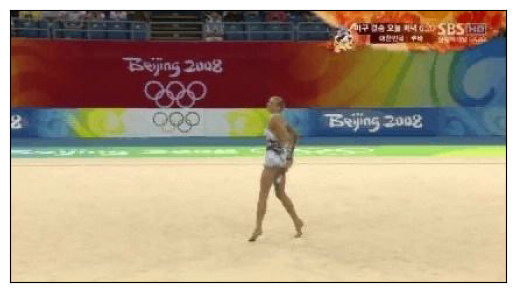

In [5]:
print("Original Image to compare:")
display_image(frame);


**QUESTION**

Secondly, at each 30 seconds of the video, show the following results

- Extracted mask
- Number of red pixels counted


Frame index: 0, Number of red pixels: 14864


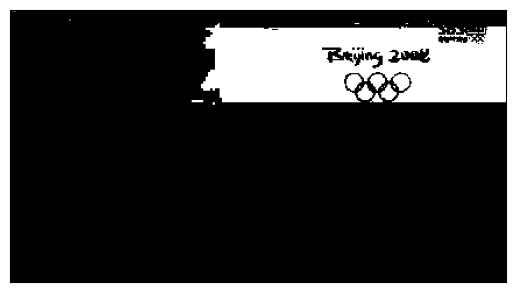

Frame index: 450, Number of red pixels: 13422


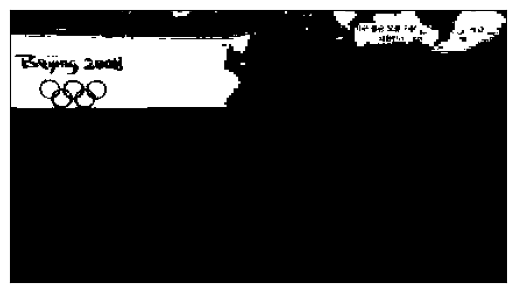

In [6]:

# YOUR CODE HERE

#################################
# Define the time interval in seconds
time_interval = 30

# Get the frames per second of the video
cap = cv.VideoCapture(file_path)
fps = cap.get(cv.CAP_PROP_FPS)
cap.release()

frame_interval = int(fps * time_interval)

for idx, (nb_red_pix, mask) in enumerate(frame_lst):
    if idx % frame_interval == 0:

        print("Frame index: {}, Number of red pixels: {}".format(idx, nb_red_pix))
        display_image(mask);
        plt.show()



#################################


### 1.4 The return of the HOG. (5 pts)

Do you remember HOG? Here is a small reminder how to use it.

Image has dimensions: (480, 640, 3)


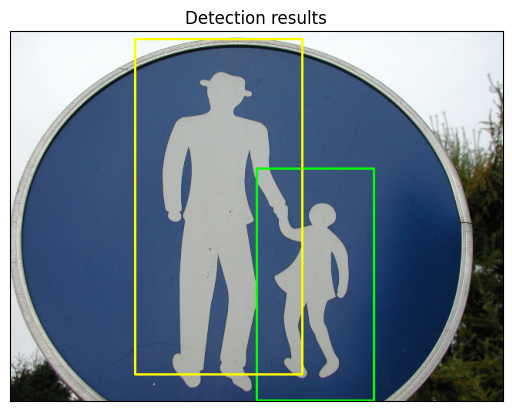

In [8]:
# initialize the HOG descriptor/person detector
hog = cv.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# load base image (check that we are not scaling, normalizing or changing the channels)
img = cv.imread(os.path.join('..','data', 'person_454.bmp'))
print('Image has dimensions: {}'.format(img.shape))

# The HOG detector returns an array with the Regions of maximum likehood to contain a human-shaped-form
rects, weights = hog.detectMultiScale(img , winStride=(4, 4), padding=(8, 8), scale=1.05)

# draw the original bounding boxes
persons = 0;
for k, (x, y, w, h) in enumerate(rects):
    cv2.rectangle(img , (x, y), (x + w - 1, y + h -1), (0, 255, k * 256), 2)
    
display_image(img);
plt.title('Detection results')
plt.xticks([])
plt.yticks([]);

Finally, you will glue together your brand new image processing function and the HOG descriptor from OpenCV above. You are asked to write a function `detection_fn` to perform person detection, and test your implementation.

### Testing your function

To test your function you need to process the video: ``../data/videos/video_skater.avi``.

**QUESTION**

 At each frame, you will use HOG to detect any person in the frame. Your function should return: 

* The image __frame__ corresponding to __the seconds 1, 2, ... , 10__ of the video with the rectangle showing the "detected area" if any. 

__Hint__: Check the second assignment if you have no idea what am I talking about.

__Be sure to display all the 10 frames for grading__


In [9]:
# 1. Write detection_fn

def detection_fn(image, params):
    """
    Run pedestrian detector on a given image.
    
    :param detector: HOG Detector instance
    :param image: Image to process
    :param params: Extra parameters needed by the function
    :return: Detected pedestrian bounding boxes
    """
    
    # YOUR CODE HERE
    box     = None
    frame   = None
    
    ########################
    detector = params["detector"]
    win_stride = params["win_stride"]
    padding = params["padding"]
    scale = params["scale"]
    rects, weights = detector.detectMultiScale(image, winStride=win_stride, padding=padding, scale=scale)
    if len(rects) > 0:
        best_idx = np.argmax(weights)
        box = rects[best_idx]
        
        
    ########################
    frame = image.copy()
    return frame, box
    
#2. Test the implementation
# Video file
file_path   =  os.path.join('..','data', 'videos', 'video_skater.avi')
params = {"detector": hog, "win_stride": (2, 2), "padding": (8, 8), "scale": 1.05}
outputs     = transform_video_file(file_path, detection_fn, params, n_frame=350);


Found box for frame 1


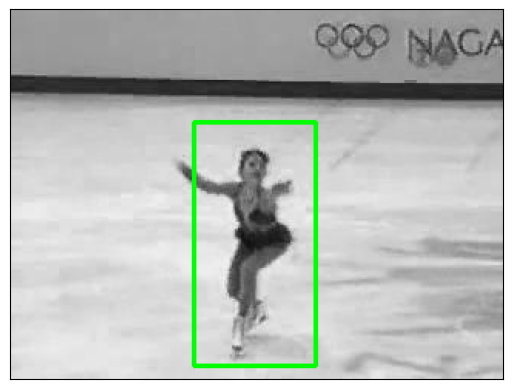

Found box for frame 2


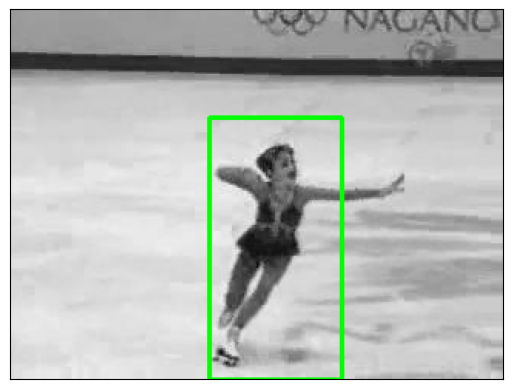

Found box for frame 3


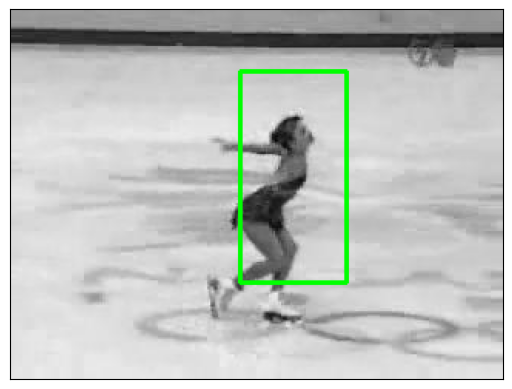

Found box for frame 4


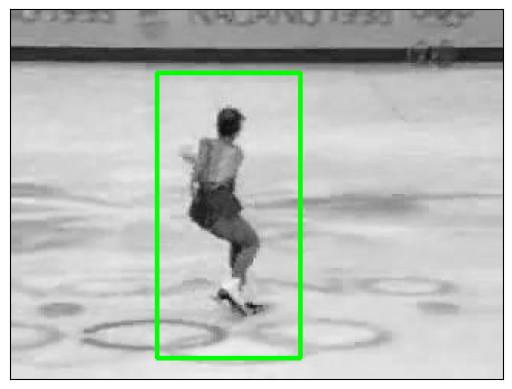

Found box for frame 5


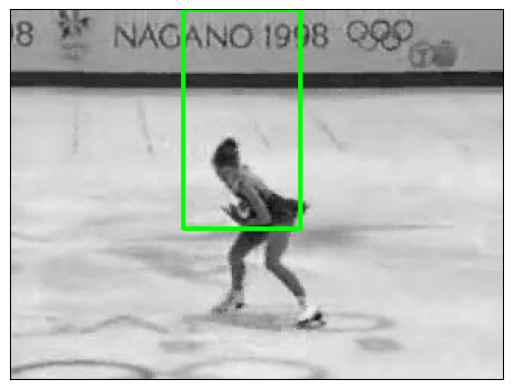

Found box for frame 6


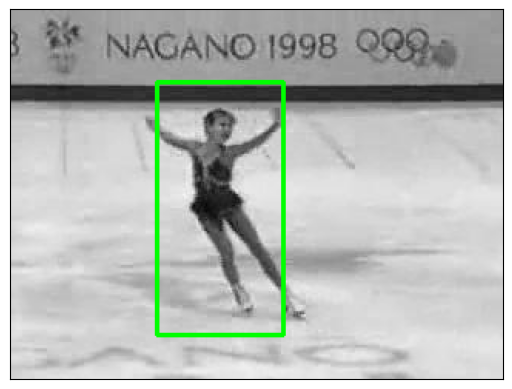

Found box for frame 7


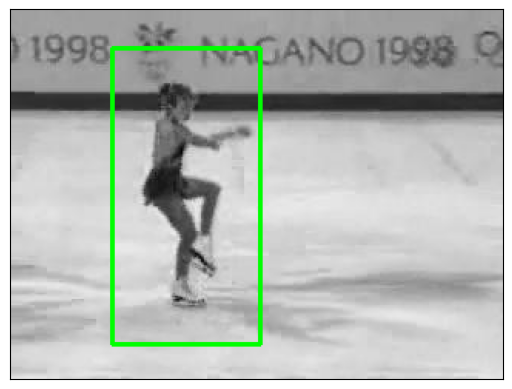

Found box for frame 8


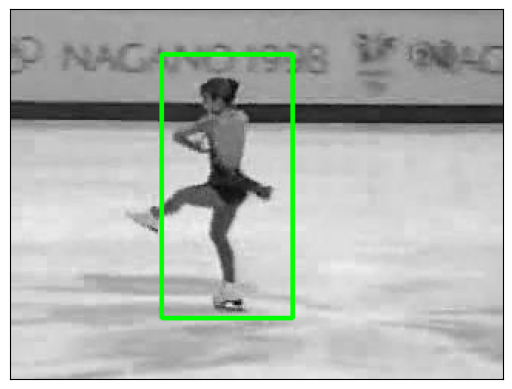

Found box for frame 9


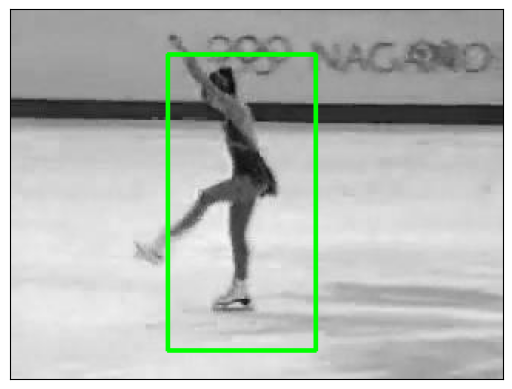

Found box for frame 10


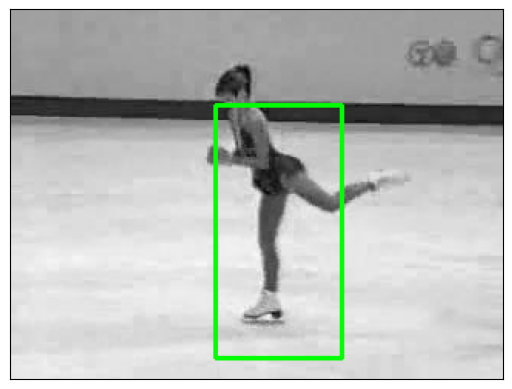

In [10]:
# 3. Display your images here
# YOUR CODE HERE
########################

time_interval = 1 # seconds
t_max         = 10
# Get fps 
cap = cv.VideoCapture(file_path)
fps = int(cap.get(cv.CAP_PROP_FPS))
cap.release()
for t in range(1, t_max+1):
    idx = int(fps * t * time_interval)
    frame = outputs[idx][0]
    boxes = outputs[idx][1]
    if boxes is not None:
        print("Found box for frame {}".format(t))
        (x, y, w, h) =boxes
        cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    else:
        print("No box found for frame {}".format(t))
    display_image(frame)
    plt.show()
########################
    

## 2 Tracking - Particles Filter

A **particles filter** is an object tracking algorithm which try to ***estimate*** the real position of an object approximating its position in the search space (i.e. image space) using a set of particles. A particle has two properties:
 
    - A state: An estimation of the quantity being tracked, in our case it will be a tuple(x, y) that represent the possible location of the object in the image space.
    - A weight: A probability that the particle is at the correct location of the object being tracked
    
The goal of the filter is to estimate the probability density function of the quantity being tracked over the whole search space. The set or particles is an approximation of this probability density function. When there are a lot of particles in a given region, the probability of the object being there is high. 
To estimate this distribution the algorithm uses Monte Carlo techniques and **approximate** this quantity. There is a total of three steps required to implement a particles filter:
 
1. Perturbate: Given a set of particles, the state is slightly perturbed in order to explore the neighbourhood of each particle. This perturbation is generally drawn from a gaussian distribution.
2. Reweight: The particle's weight are updated in this step. Given a set of measurements (*i.e. perturbed particles*) a similarity metric is computed between the measurements and the object model (*i.e. template*). Particle with high similarity will have a large weight (*i.e. the measurement looks very much like the object*) whether a particle with low similarity will be assigned a small weight (*i.e. the measurement does not look like the object*). The reweighting step adapts the estimation of the probability density function of the quantity being tracked.
3. Resample: The set of particles is updated by sampling in the previous collection of particles using the newly estimated probability density function. Since particles similar to the object have a higher chance to be chosen, the new set of particles should have states located on the actual object.
 
In the following section you will implement these three steps from scratch with the help of the class `ParticleFilterInterface` from file `utils.py`. This class has the following members that will be used in the different methods.
 
- `self.model`: The template of the object being tracked, np.ndarray
- `self.search_space`: The dimensions of the search space, tuple
- `self.n_particles`: The total number of particles used to estimate the distribution, int
- `self.state_dims`: The number of component of each state, int (*i.e. 2 in our case, x/y*), tuple
- `self.sigma_perturbation`: Standard deviation of the perturbation applied to the particles, float
- `self.sigma_similarity`: Standard deviation of the residual error used when computing similarity, float
- `self.alpha`: Blending coefficient used during model adaptation phase, float
- `self.particles`: Collection of particles states stored as 2D array, first column is x, second is y, np.ndarray
- `self.weights`: Distribution estimation, 1D array
- `self.state`: Current best estimation of the object position, np.ndarray
- `self.indexes`: List of index for each particles, nd.array
 



### 2.1 Step 1 : Perturbation (15 pts)
 
In the following cell, two functions need to be implemented to make the tracker work. The methods are: `_initialize_particles` and `perturbate_impl`.
 
The first one, is responsible to initialize each particle's state and weight respectively. Particle's states are stored into a 2D array of dimensions **(#Particles, #States)**, where the first column correspond to the **x** coordinate in the image space the second column is the **y** coordinate. At initialization, each component of the states are uniformly sampled from the search space dimensions (*i.e. image dimensions*).
 
Particles' weights are stored into a 1D array of dimension **(#Particles,)**. Each weight represents the probability of the particle being at the real location of the tracked object. At initialization, particles are equiprobable with a probability of $\frac{1}{\#Particles}$. Moreover the weights need to represent a valid probability distribution function and, therefore, they have to sum to one.
 
The second method is responsible to add perturbation on the particle state. Each perturbation is sampled from a gaussian distribution defined as $\mathcal{N}\left(0, \sigma_{p}^2 \right)$. This perturbation is responsible for exploring the neighbourhood of each particle by randomly moving around.
 
**QUESTION**
 
In the following cell, implement the methods `_initialize_particles` and `perturbate_impl`.


In [11]:
class ParticleFilterStepOne(ParticleFilterInterface):
    
    def __init__(self,
                 model,
                 search_space,
                 n_particles,
                 state_dims,
                 sigma_perturbation=10.0,
                 sigma_similarity=20.0,
                 alpha=0.0,
                 update_rate=10):
        """
        Constructor
        :param model:         Template image to be tracked (numpy.ndarray)
        :param search_space:  Possible size of the search space (i.e. image size)
        :param n_particles:   Number of particle used to perform tracking
        :param state_dims:    State space dimensions (i.e. number of parameters
                              being tracked)
        :param sigma_perturbation: How much each particle will be perturbated, float
        :param sigma_similarity:  Similarity residual distribution
        :param alpha:         Blending factor for model adaptation, float
        :param update_rate:   Frequency at which the model will be updated, int
        """
        super(ParticleFilterStepOne, self).__init__(model,
                                                    search_space,
                                                    n_particles,
                                                    state_dims,
                                                    sigma_perturbation,
                                                    sigma_similarity,
                                                    alpha)
        self.state = None
        self.update_rate = update_rate
        self._initialize_particles()
        self._check_particle_dims(init=True)
        self._check_weights()
        
    def _initialize_particles(self):
        """
        Initialize each particle state by sampling uniformly the whole serch space. Plus the each weight
        associated to a particles is initialized with a uniform probability:
        """
        
        # YOUR CODE HERE
        
        ### Random initialisation
        locations = np.stack([np.random.uniform(0, self.search_space[i],
                                    self.n_particles) for i in reversed(range(self.state_dims))])
        self.particles = locations.T
        ### Compute weights
        size = self.n_particles
        self.weights = np.ones(size)/size
        
        return
        
    def update(self, frame):
        """
        Update particle filter for a new frame
        :param frame: New frame in the tracking sequence
        :return:  Best state (i.e. estimated position
        """

        # Step 1: Perturbation
        self.perturbate()
        
        # Step 2:Other steps goes here
        # ...
        
        self.state = self.current_state()
        return self.state
    
    def perturbate_impl(self):
        """ Perturbate particles with random noise """
        
        # YOUR CODE HERE
        
        noise = np.random.normal(loc = 0, scale = self.sigma_perturbation, size = self.particles.shape)
        self.particles += noise


        return 

The next cell creates a tracker that runs the initialization step, then displays the current particle state at that time.
 
On the left side is your state initialization and on the right side is one possible solution which should be close to the one you have. It is there as a reference.

**QUESTION** 

Why is the solution not exactly the same as the reference?
 

Text(0.5, 1.0, 'Expected behaviour')

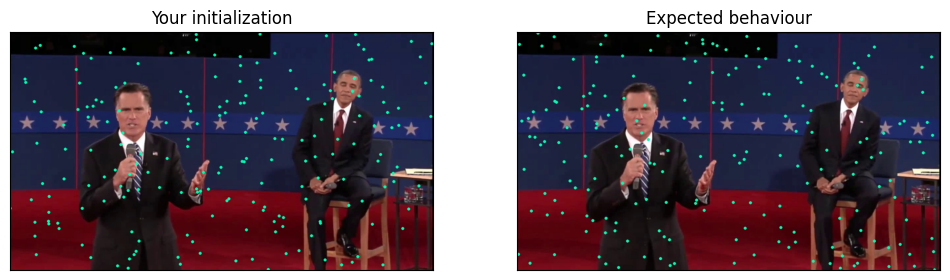

In [12]:
# Load test image
path = os.path.join('..','data', 'particles_filter', 'frame000.jpg')
frame = cv.imread(path)

# Define model
miny = 175
maxy = miny + 129
minx = 321
maxx = minx + 104
model = frame[miny:maxy, minx:maxx]
# Create particle filter
pf = ParticleFilterStepOne(model=model,
                           search_space=frame.shape[:2],
                           n_particles=200,
                           state_dims=2)
# Draw particle's state
canvas = pf.draw_particles(np.copy(frame))
canvas_true = cv.imread(os.path.join('..','data', 'particles_filter', 'intialized_particles.jpg'))

fig, ax = plt.subplots(1, 2, figsize=(12, 7))
display_image(canvas, axes=ax[0])
ax[0].set_title('Your initialization')
display_image(canvas_true, axes=ax[1])
ax[1].set_title('Expected behaviour')

**Your answer**

Since we initialize randomly the particles (uniformaly spread over the whole frame), our initial state will be different each time we run the cell and it will also not be exactly the same as the reference. 

However, the repartition is rather the same as the expected behaviour since it spreads uniformaly the particules over the image.

In the next cell, the tracker function `update` is called, it applies the first step of the tracking process. Meaning the particles will have a new state (*i.e. position*), to highlight this, the new particles are drawn in **red**. If it is **NOT** the case, check your code!

 
**QUESTION**

**Comment** on what you observe, does the particle state change ? Is the perturbation somehow what is expected ? How could you check that the implementation of the perturbation is correct? 

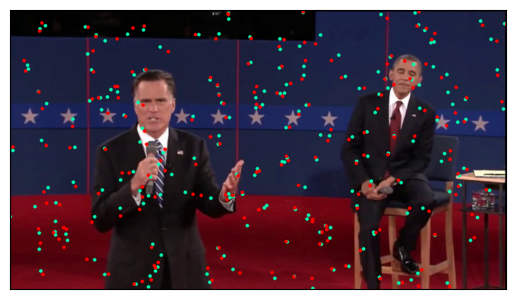

In [13]:
# Apply first step of tracking
pf.update(frame)

# Draw particles, should have new position
canvas_perturbated = pf.draw_particles(np.copy(canvas), color=(0, 0, 255))
display_image(canvas_perturbated);

**Your answer**

- It is observable that particle the state changes a little bit as we see that the red dots are not perfectly over the green ones. This means that the position of the particles has changed for almost all the particles during the update and moved a few pixels away from the initial location.

- It seems that the perturbations fit what we should expect as each red dot is only a few pixels away from a green one and this holds in all the directions. This means that the `size of the diplacement caused by the noise is restrained by its variance` and `this displacement happens in all the directions` around the original point for the different particles. Furthermore, we see that for each green dot the probability of having its red dot (updated location) in the neighbourhood decreases with the distance i.e. `the new locations are more likely to be close to the previous locations`. This is clearly the effect of a perturbation caused by a gaussian random noise (`perturbation in all the direction` + `the closer from the central point, the more likely it is`).

- We could check the implementation of the perturbation by running several updates, store the updated locations (but keep the initial position as particle state) and observe how the perturbations behave around one or several particles. We could then see if we always get different results for the updated position and if it matches a gaussian noise around the fixed position (the initial particle state). A little example of the expected behaviour is made in the next cells.

### Visualization of the expected behaviour of the perturbation of the particle state

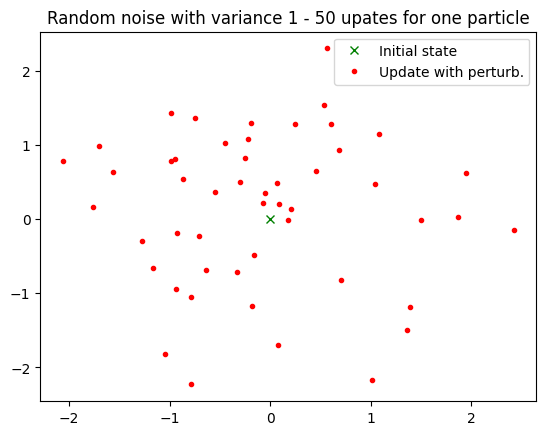

In [14]:
noise = np.random.normal(0, 1, (2, 50))

plt.title("Random noise with variance 1 - 50 upates for one particle")
plt.plot(0, 0, 'x', color='g', label='Initial state')
plt.plot((noise)[0], (noise)[1], '.', color='r', label='Update with perturb.');
plt.legend()

If we were to consider the displacement of one particle after performing 50 updates with a fixed initial state, we should observe a displacement similar to the random noise plotted in the previous cell (centered at (0, 0)). This should be the expected behaviour of the perturbation since we use the same function `np.random.normal` but just with a different variance. 

### 2.2 Step Two : Reweighting (15 pts)

The reweighting function performs two steps:
    
1. Measure the similarity between the image patch centered at every particle state and the object model.
2. Update the weights probability distribution according the measured similarity

**QUESTION** 

In the next cell, complete the implementation of the similarity function. To measure the similarity between two samples `x` and `y`, first the Mean Squared Error is computed then it is assumed that it follows a normal distribution in the form of N(0, sigma):

$$
\begin{align}
    r &= \frac{1}{N} \sum_{i=0}^{N} \left(x_i - y_i\right)^{2}, \quad N = 3\cdot H \cdot W \\
    s &= \exp(-\frac{r}{2\sigma^{2}})
\end{align}
$$

In [15]:
def similarity_fn(x, y, sigma):
    """
    Compute similarity between `x` and `y` assuming the residual difference
    follow a gaussian distribution N(0, sigma).
    Special case, when the shape of `x`/`y` are not the same/empty it must return a similarity of 0.0
    :param x: First image
    :param y: Second image to compare
    :param sigma: Standard deviation of the residual differences
    :return: Scalar value, similarity between `x` and `y`
    """
    
    # YOUR CODE HERE
    if (np.any(x)==False) or (np.any(y)==False) or (x.shape!=y.shape):
        return 0.0
    
    else:
        r = np.sum(np.subtract(x, y, dtype=np.float32)**2)
        N = float(x.shape[0]*x.shape[1]*x.shape[2])
        sim = np.exp(-r/N/(2*(sigma**2)))
        
        return sim
    


In [16]:
# Test your similarity_fn
patch1 = np.copy(model)
patch2 = frame[miny+5:maxy+5, minx+5:maxx+5]
patch3 = np.asarray([])

msg = 'Something is wrong with your similarity function, check you math'
sim_1 = similarity_fn(patch1, patch1, sigma=40.0)
print('Similarity between the same patch: {:.2f}'.format(sim_1))
assert np.round(sim_1, 2) == 1.00, msg
sim_2 = similarity_fn(patch1, patch2, sigma=40.0)
print('Similarity between two different patches: {:.2f}'.format(sim_2))
assert np.round(sim_2, 2) == 0.70, msg
sim_3 = similarity_fn(patch1, patch3, sigma=40.0)
print('Similarity between two different size patches: {:.2f}'.format(sim_3))
assert np.round(sim_3, 2) == 0.00, msg

Similarity between the same patch: 1.00
Similarity between two different patches: 0.70
Similarity between two different size patches: 0.00


**QUESTION** 

In the next cell, implement the `reweight_impl` function responsible to update the probability distribution of the particles. The following steps are required

- Extract patches of the frame centered at the particle's state
- Compute similarity between the `model` and every patches
- Normalize the `weights` to have a valid probability distribution

In [17]:
class ParticleFilterStepTwo(ParticleFilterStepOne):
    
    def __init__(self,
                 model,
                 search_space,
                 n_particles,
                 state_dims,
                 sigma_perturbation=10.0,
                 sigma_similarity=20.0,
                 alpha=0.0,
                 update_rate=10):
        """
        Constructor
        :param model:         Template image to be tracked (numpy.ndarray)
        :param search_space:  Possible size of the search space (i.e. image size)
        :param n_particles:   Number of particle used to perform tracking
        :param state_dims:    State space dimensions (i.e. number of parameters
                              being tracked)
        :param sigma_perturbation: How much each particle will be perturbated, float
        :param sigma_similarity:  Similarity residual distribution
        :param alpha:         Blending factor for model adaptation, float
        :param update_rate:   Frequency at which the model will be updated, int
        """
        super(ParticleFilterStepTwo, self).__init__(model,
                                                    search_space,
                                                    n_particles,
                                                    state_dims,
                                                    sigma_perturbation,
                                                    sigma_similarity,
                                                    alpha)
        
    def update(self, frame):
        """
        Update particle filter for a new frame
        :param frame: New frame in the tracking sequence
        :return:  Best state (i.e. estimated position
        """
        self.perturbate()
        self.reweight(frame)
        # Other steps goes here
        # ...
        
        self.state = self.current_state()
        return self.state
    
    def reweight_impl(self, frame):
        """
        Update particle's weight for the current frame
        :param frame: New frame in the tracking sequence
        """
        
        # YOUR CODE HERE
        
        ### 1. Patch extraction
        height, width = self.model.shape[:2]
        
        low_x = (self.particles[:, 0]-width/2).astype(int)
        low_y = (self.particles[:, 1]-height/2).astype(int)
        
        new_spot = [frame[low_y[i]:(low_y[i]+height), low_x[i]:(low_x[i]+width)] for i in range(self.n_particles)]
        
        ### 2. Compute similiarity
        self.weights = np.array([similarity_fn(k, self.model, self.sigma_similarity) for k in new_spot])
        
        ### 3. Normalization of the weights
        self.weights /= np.sum(self.weights)

        return

The next cell will instanciate a tracker and display the evolution of the weights for a single step of tracking. 

**Question**

**Comment** on what you observe, is it following what you're expecting ? What does a high score mean ? What is the expected range of the weights ?

**Your answer**

*Observations*
- As we could expect, the weights initilization are the same for all particules because they are all set to $\frac{1}{N_{particles}}$ at the beginning (= 0.005). We can observe that the updated weights are generally a bit smaller than the initialization. However, we can see several peaks of higher values. The repartition is sparsed between lower value than the initial ones and high peaks. 

*High score definition and expectations*
- A high score (weight) means that the particle has a high similarity with the object model since the definition of the weight is `the probability that the particle is at the correct location of the object being tracked`. Therefore, it was to be expected that only a few weights should increase with the update as only a few particules are located at places that could match the model. 

*Range*
- The sum of the weights must always be one as we are normalizing the weights at the end of `reweight_impl`, so the range of these is between 0 and 1. But after one upadate the values are spread between 0 and 1 with most of them close to 0 as they do not match the model.

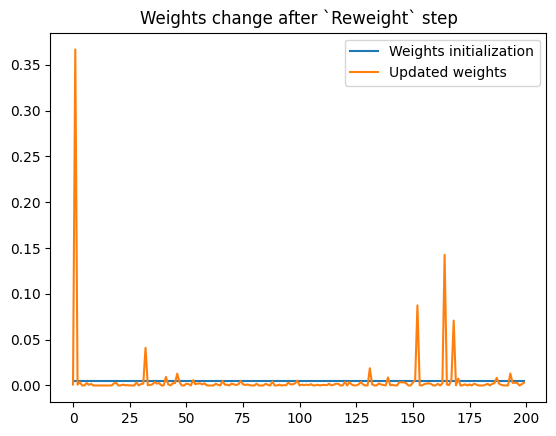

In [28]:
# Create particle filter
pf = ParticleFilterStepTwo(model=model,
                           search_space=frame.shape[:2],
                           n_particles=200,
                           state_dims=2)
# Save initial weights
w_init = np.copy(pf.weights)

# Update tracker using current frame
pf.update(frame)

# Show updated weights
w = pf.weights

plt.figure()
plt.plot(w_init)
plt.plot(w)
plt.title('Weights change after `Reweight` step')
plt.legend(['Weights initialization',
            'Updated weights'])
plt.show()

In [29]:
### Check if w_init = 1/n_particules
print(w_init[0])

0.005


### Performing updates to see the evolution of the weights

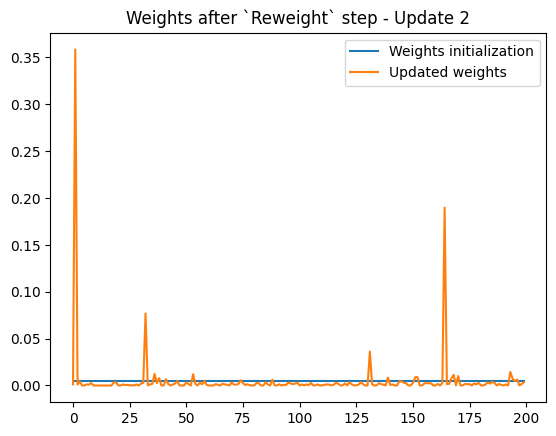

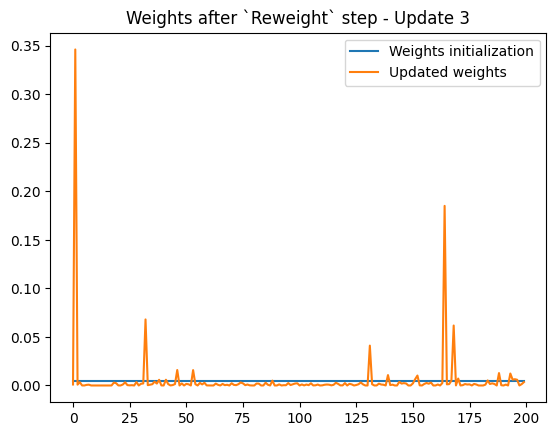

In [31]:
# Update tracker using current frame
pf.update(frame)

# Show updated weights
w = pf.weights

plt.figure()
plt.plot(w_init)
plt.plot(w)
plt.title('Weights after `Reweight` step - Update 2')
plt.legend(['Weights initialization',
            'Updated weights'])
plt.show()

# Update tracker using current frame
pf.update(frame)

# Show updated weights
w = pf.weights

plt.figure()
plt.plot(w_init)
plt.plot(w)
plt.title('Weights after `Reweight` step - Update 3')
plt.legend(['Weights initialization',
            'Updated weights'])
plt.show()

As we can see on the plots corresponding to `Update 2` and `Update 3`, the weights generally remains rather the same i. e. the peaks appear at the same particles and only their sizes change a bit. This is because of the gaussian perturbation that happens at each update. The particles only move a little bit around their previous locations but stay in the neighbourhood and therefore genrally keep comparable weights (either peak or low value). 

As we will see in the next cell (and as already explained), the weight of a particl is a measure of similarity between the model and the patch around the considered particle. Let us visualize this clearly with a small experiment.

### Visualize the meaning of the weights

In [32]:
### Extract Obama's face ###

height, width = model.shape[:2]
miny_ob = 110
maxy_ob = miny_ob + height
minx_ob = 968
maxx_ob = minx_ob + width

Patches around the particles centered on Romney's and Obama's face:


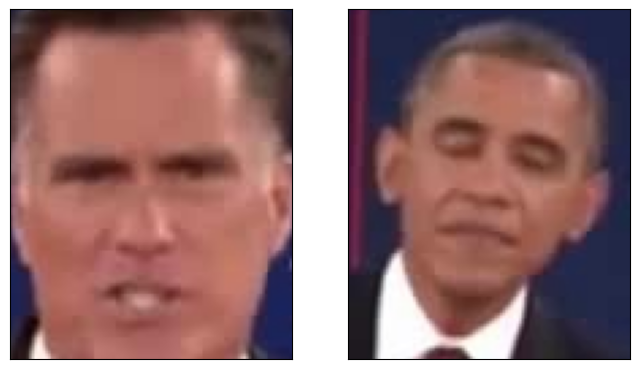

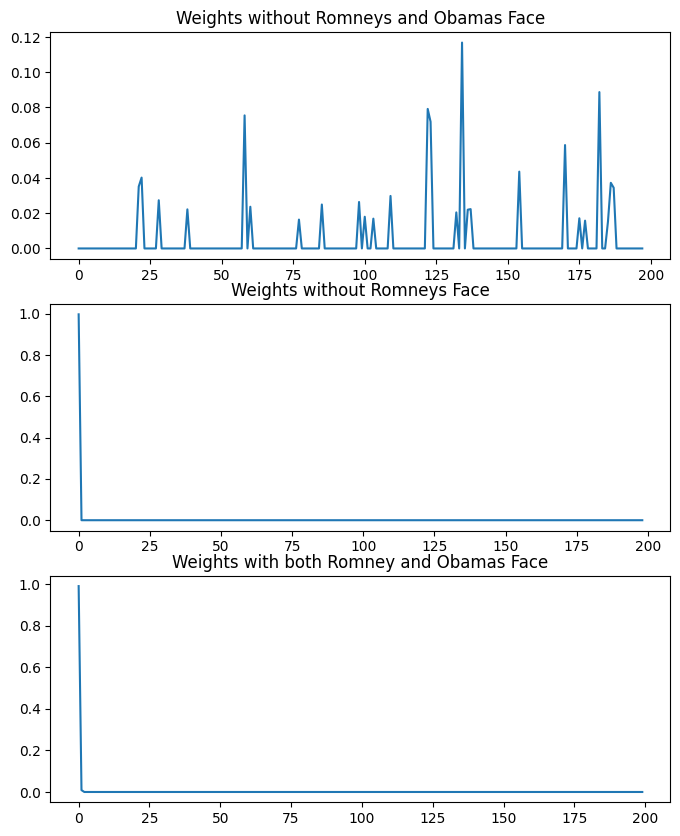

First weight plot 2 (particle on Obama's face):  0.9969347731664705
First weight plot 3 (particle on Romney's face):  0.9910100581061932


In [33]:
### Particle centered on Romney's face
part_one = np.array([(minx+maxx)/2, (miny+maxy)/2]) 

### Particle centered on Obama's face
part_two = np.array([(minx_ob+maxx_ob)/2, (miny_ob+maxy_ob)/2]) 

parts = [part_one, part_two]

### Draw 198 other partcles at random in a region without faces ###
new_parts = np.stack([np.random.uniform(0, 100, 198) for i in reversed(range(2))]).T
new_spot = []

### Load region around each particle ###
for p in parts: 
    low_x = (p[0]-width/2).astype(int)
    low_y = (p[1]-height/2).astype(int)
    new_spot.append(frame[low_y:(low_y+height), low_x:(low_x+width)]) 

for p in new_parts:
    low_x = (p[0]-width/2).astype(int)
    low_y = (p[1]-height/2).astype(int)
    new_spot.append(frame[low_y:(low_y+height), low_x:(low_x+width)])

print("Patches around the particles centered on Romney's and Obama's face:")
fig, ax = plt.subplots(1, 2, figsize=(8, 10))
display_image(new_spot[0], axes=ax[0])
display_image(new_spot[1], axes=ax[1])

### Compute similiarity ###
weights1 = np.array([similarity_fn(k, model, 20) for k in new_spot[2:]])
weights2 = np.array([similarity_fn(k, model, 20) for k in new_spot[1:]])
weights3 = np.array([similarity_fn(k, model, 20) for k in new_spot])
### Normalization of the weights ###
weights1 /= np.sum(weights1)
weights2 /= np.sum(weights2)
weights3 /= np.sum(weights3)

fig, ax = plt.subplots(3, 1, figsize=(8, 10))
ax[0].set_title('Weights without Romneys and Obamas Face')
ax[0].plot(weights1)
ax[1].set_title('Weights without Romneys Face')
ax[1].plot(weights2)
ax[2].set_title('Weights with both Romney and Obamas Face')
ax[2].plot(weights3)
plt.show()

print("First weight plot 2 (particle on Obama's face): ", weights2[0])
print("First weight plot 3 (particle on Romney's face): ", weights3[0])

In this part, we took two particles of the picture with one centered on the model (Romney's face) and another centered on Obama's face. The other particles were drawn randomly in a region of the picture where no faces appear. We then plot the weights to see how they behave.

We can understand thanks to this example that the weight is the measure of "how well" a region centered on a considered particle matches our model, considering the following oberservations:

- It is observable that on the `first plot`, the weights are more or less randomly distributed because the particles lay in a region that is very different from the model and the particles on Obama's and Romney's face are not considered. **So nothing really matches well the model**.

- However, on the `second plot` we can see that the weight of the first particle (corresponding to Obama's face) is roughly 1 while the others are ~0. **The particle centered on Obama's face best matches the model** since the model is also a face and the particle on Romney's face is not considered. Therefore it gets a weight of ~1 and the other particles that lay on the background have their weights set to ~0.

- Finally, on the `third plot` containing all the particles including the ones centered Obama's and Romney's face, we can observe that the first particle (corresponding to Romney's face) got a weight of 1 while the others are set to 0. Even the particle centered on Obama is ignored and its weight is ~0. **We can conclude that the implementation has recognized the model and therefore has given a weight of 1 to it.**

Knowing this, what would be of interest to us now is to make particles with a smaller weight converging to the location of the ones with higher weights to find an object matching the model. This will be the resampling part.

### 2.3 Step Three : Resample (15 pts)

The purpose of this step is to resample a new set of particles using the current estimation of the particle's distribution (*i.e. weights*). Remember, the particles have been previously perturbated and reweighted, therefore the distribution is different. The new set of particles new to be sampled using the updated probability distribution, meaning particles with high probability will be selected more often then the one with small weight.

Once a new set of particles have been sampled, you need to be sure that the state is still valid, therefore a clipping step is added in order to ensure the state remain in the image space.

**QUESTION**
In the following class, implement the resampling scheme inside the function `resample_impl`. 

*Hint*: You may want to use np.random.choice in your implementation to perform this resampling step.

In [34]:
class ParticleFilterStepThree(ParticleFilterStepTwo):
    
    def __init__(self,
                 model,
                 search_space,
                 n_particles,
                 state_dims,
                 sigma_perturbation=10.0,
                 sigma_similarity=20.0,
                 alpha=0.0,
                 update_rate=10):
        """
        Constructor
        :param model:         Template image to be tracked (numpy.ndarray)
        :param search_space:  Possible size of the search space (i.e. image size)
        :param n_particles:   Number of particle used to perform tracking
        :param state_dims:    State space dimensions (i.e. number of parameters
                              being tracked)
        :param sigma_perturbation: How much each particle will be perturbated, float
        :param sigma_similarity:  Similarity residual distribution
        :param alpha:         Blending factor for model adaptation, float
        :param update_rate:   Frequency at which the model will be updated, int
        """
        super(ParticleFilterStepTwo, self).__init__(model,
                                                    search_space,
                                                    n_particles,
                                                    state_dims,
                                                    sigma_perturbation,
                                                    sigma_similarity,
                                                    alpha)
        
    def update(self, frame):
        """
        Update particle filter for a new frame
        :param frame: New frame in the tracking sequence
        :return:  Best state (i.e. estimated position
        """
        self.perturbate()
        self.reweight(frame)
        self.resample()
        # Other steps goes here
        # ...
        
        self.state = self.current_state()
        return self.state
    
    def resample_impl(self):
        """ 
        Resample a new set of particle based on update weight distribution and previously 
        perturbated particles
        Hint: You may want to use `np.random.choice` here
        """
        
        # YOUR CODE HERE
        
        ind, size, wght = self.indexes, self.n_particles, self.weights.T
        
        ### Resample using the updated weights
        new_dist = np.random.choice(ind, size=size, replace=True, p=wght)
        
        ### Apply to particle
        self.particles = np.array(self.particles[new_dist])
        
        ### Correction for particles out of range
        height, width = self.search_space[:2]
        ### Along witdth
        self.particles[:, 0] = np.where(self.particles[:, 0]>0, self.particles[:, 0], 0)
        self.particles[:, 0] = np.where(self.particles[:, 0]<width, self.particles[:, 0], width-1)
        ### Along height
        self.particles[:, 1] = np.where(self.particles[:, 1]>0, self.particles[:, 1], 0)
        self.particles[:, 1] = np.where(self.particles[:, 1]<height, self.particles[:, 1], height-1)


        return

The next cell creates a tracker and performs the three steps of the particle filter (*The update step is performed twice in order to emphasis the impact of the resampling step*). It shows the states of the particles at initialization (*i.e. in green*) and after resampling (*i.e. in red*). The last figure shows the expected behaviour.

**QUESTION** 

**Comment** on what you observe, how the particle states change ? Why does it converge to the object ?

**Your answer**

It can be observed that only after two updates, all the particles are converging to Romney's face. It is not as precise as the expected behviour, but they are all aggregated around the same place corresponding to the model.

The particles converge there since at each update we calculate the weights at that time and see which particle is in a region that could match the model i.e. has a high weight (step 2). We then use those weights to resample the particle state (step 3). This means that particles with a higher weight will attract others that have smaller weights since the latter are less likely to match the model. Two updates are sufficient to see the benefits of this technique. Performing more update might slightly increase the precision, but not for sure since a random process is involved in the resampling.

Text(0.5, 1.0, 'Expected behaviour')

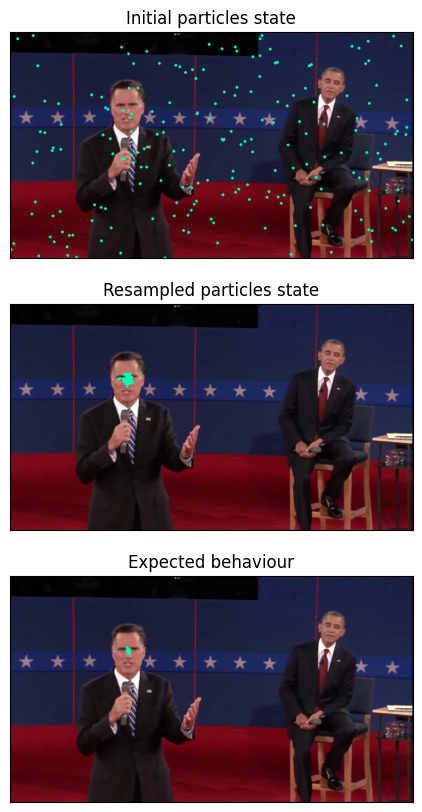

In [37]:
# Create particle filter
pf = ParticleFilterStepThree(model=model,
                             search_space=frame.shape[:2],
                             n_particles=200,
                             sigma_perturbation=20.0,
                             sigma_similarity=15.0,
                             state_dims=2)
# Save initial particle position
initial_particles = pf.draw_particles(np.copy(frame))

# Update tracker
pf.update(frame)
pf.update(frame)

# Draw particle's state after resampling
resampled_particules = pf.draw_particles(np.copy(frame))
resampled_true = cv.imread(os.path.join('..','data', 'particles_filter', 'resampled_particles.jpg'))

fig, ax = plt.subplots(3, 1, figsize=(14, 10))
display_image(initial_particles, axes=ax[0])
ax[0].set_title('Initial particles state')
display_image(resampled_particules, axes=ax[1])
ax[1].set_title('Resampled particles state')
display_image(resampled_true, axes=ax[2])
ax[2].set_title('Expected behaviour')

### Visualization of the evolution of the weights after resampling

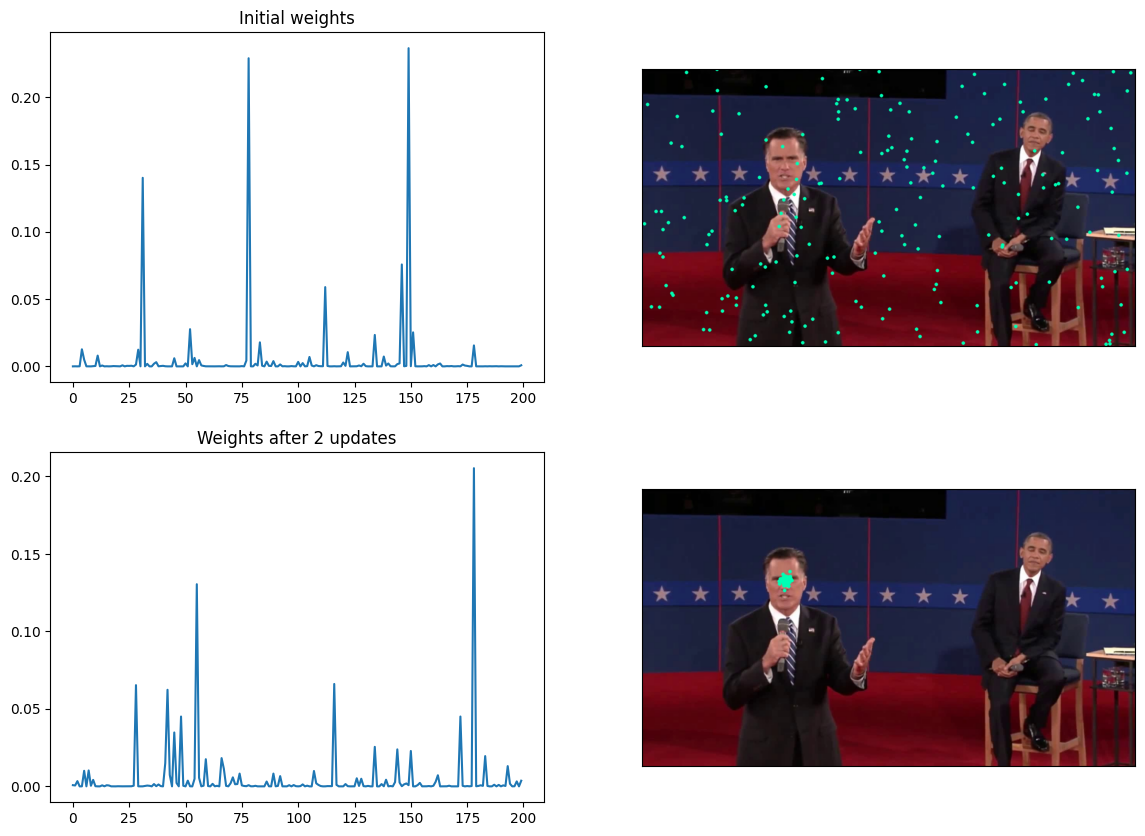

In [41]:
pf = ParticleFilterStepThree(model=model,
                             search_space=frame.shape[:2],
                             n_particles=200,
                             sigma_perturbation=20.0,
                             sigma_similarity=15.0,
                             state_dims=2)

# Plot initial particle position
initial_particles = pf.draw_particles(np.copy(frame))
w_init = np.copy(pf.weights)

fig, ax = plt.subplots(2, 2, figsize=(14, 10))
ax[0][0].plot(w)
ax[0][0].set_title('Initial weights')
display_image(initial_particles, axes=ax[0][1])


pf.update(frame)
pf.update(frame)
w = pf.weights
ax[1][0].plot(w)
ax[1][0].set_title('Weights after 2 updates')
resampled_particules = pf.draw_particles(np.copy(frame))
display_image(resampled_particules, axes=ax[1][1])

Thanks to the previous cell, we can understand the principle of the resampling and visualize its benefit. After 2 updates it is observable that weights are slightly better distributed because particles have converged to a region that better matches the model. In an ideal case, all the particles would be at the same place (at the center of the model) and have the same weights i. e. be uniformaly distributed. Here this is not the case because of the random process while resampling, the particles are not exactly at the same position. Therefore, particles that are really close to the center of the model get higher weights than others that are a bit further away (even if they are not far away from the center) and get smaller weights or sometimes 0. 

**However, it might also happen that the weight do not get better distributed**, for instance if one is perfectly centered on the face and the others are a bit off center, then the particle perfectly centered will have a weight close to 1 or even 1 and the others ~0 even if the are close to the center of the face. 

Now, you will use the `transform_video_file` function you've coded earlier to track Romney's face in the first 300 frames of the video `videos/pres_debate.avi`. The initialized particle filter will pass to the `particles_filter_fn` through the params variable. It will be packed in a dictionnary with the key set to 'tracker'.

**QUESTION**

**Complete** the implementation of the tracking function. 

*Hint*: Too draw the state of the tracker, you can use the method `visualize_filter` of the particle filter

In [42]:
def particles_filter_fn(frame, params):
    """
    Run one step of particles filter and draw tracking results on top of the image
    :param params: dict instance with the following entries: 
                    'tracker': Tracker instance
    :return: frame with detected area
    
    """
    
    # YOUR CODE HERE
    
    ### Load params
    p_filter = params['tracker']    
    
    ### Track on the frame
    p_filter.update(frame)
    
    ### Visualize the result
    res = pf.visualize_filter(np.copy(frame))

    return res

In [43]:
# Load face model
model = cv.imread(os.path.join('..', 'data', 'particles_filter', 'face_model.jpg'))
# Create particle filter
pf = ParticleFilterStepThree(model=model,
                             search_space=(720, 1280),
                             n_particles=200,
                             sigma_perturbation=10.0,
                             sigma_similarity=10.0,
                             state_dims=2)

# Set parameters
params = {'tracker': pf}

# Call tracking function on video
video_path = os.path.join('..', 'data', 'videos', 'pres_debate.avi')
results = transform_video_file(video_path, particles_filter_fn, params=params, n_frame=300)

**QUESTION** 

In the next cell, display the tracking results every 30 frames.

**Comment** on what you observe, is the tracking good ? What happen when he turns his head ? Is the object model good enough ? What happened if you run the detection from scratch several times?

**Your answer**

In some cases the tracking seems to be rather good (cf pictures below). At the beginning (1st picture) it might be less accurate as we might not have performed enough updates to have a perfect result, but then we see that the particles have completely converged to the center of Romney's face (on picture 2 and 3 for ex.) and thus, the tracking result is really good in this case. But Romney does not move a lot, so the tracking is not hard to perform in this case. 

For the last frames, even if Romney's face is directed towards Obama and does not face the camera, the tracking still performs well even if it is a little bit less accurate as it cannot perfectly match the model (Romney's face facing the camera). The tracking in this case is possible if the particles have already converged to his face, because the similarity between the model and Romney's face when he turns his head will be lower than when facing the camera. Thus, we can conclude that having a fixed model is not optimal.

Also, the result might be different if we do the same experiment from scratch several times! The particles sometimes converges to Obama's face which is wrong. If no particles were on Romney's face at the initialization but one was on Obama's face, the latter will attract the other particles around its place. This corresponds to the case 2 in our part `Visualize meaning of the weights`.

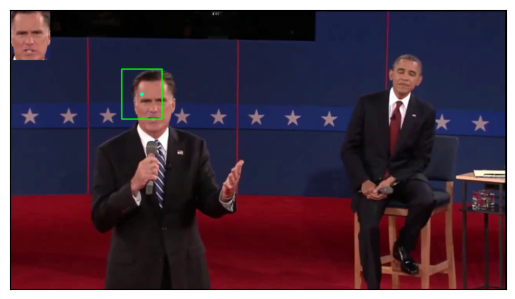

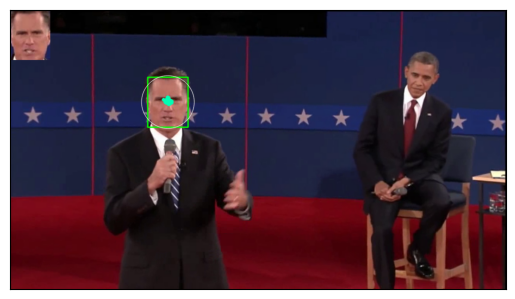

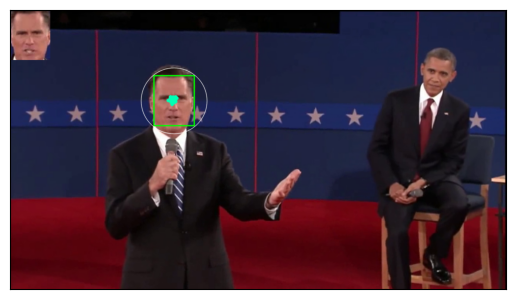

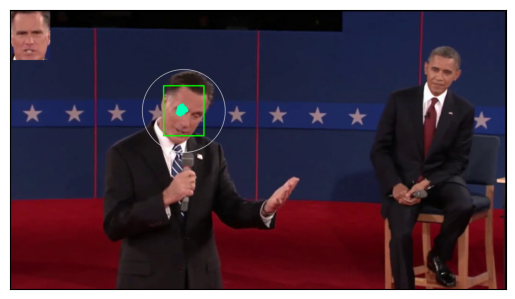

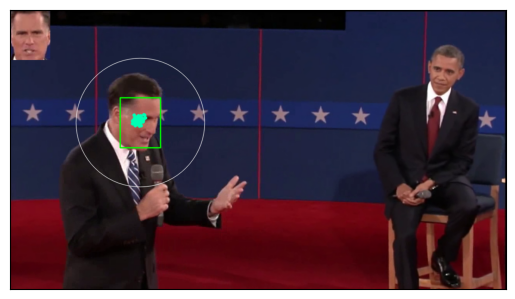

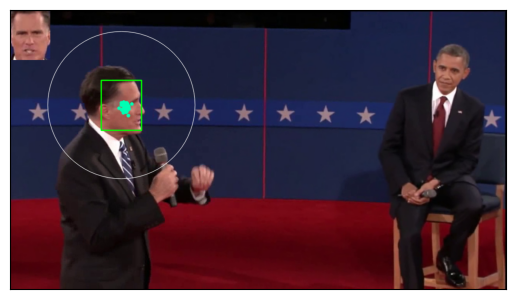

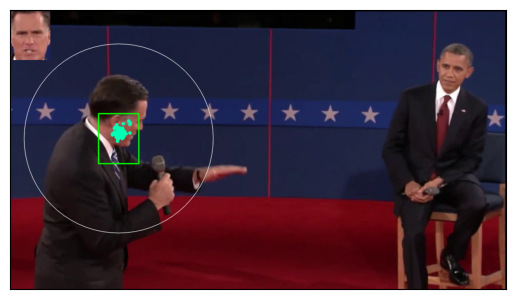

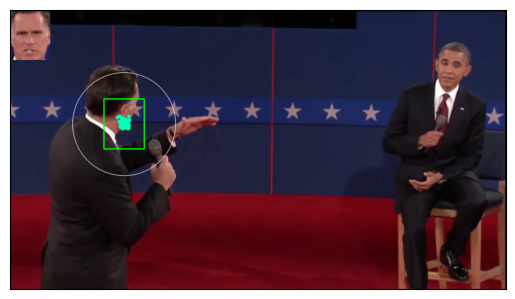

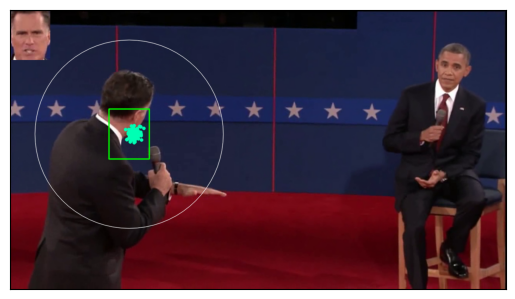

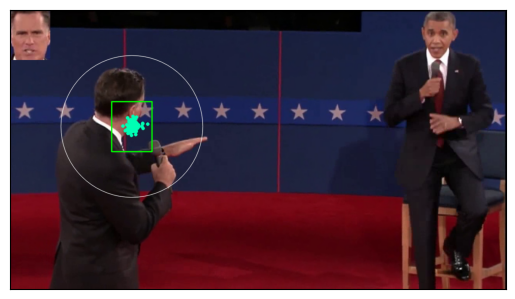

In [44]:

# YOUR CODE HERE
for i, r in enumerate(results):
    if i % 30 == 0:
        plt.figure()
        display_image(r)

### 2.4 Step Four : Model adaptation (15 pts)

Having a fixed model of the object is not optimal when there is movement (*i.e. out of plane rotation*). Therefore in the next section, a simple model adaptation will be implemented into our particles filter.

The model will not be updated every frame to ensure a smooth transition in term of appearance. The update rate is controled with the `update_rate` parameter in the constructor. The model adaptation consists of a linear interpolation between the patch located at the current best position estimation (*i.e. self.state*) and the previous model.

$$
M_{new} = \alpha \cdot P_{best} + \left(1 - \alpha \right) M_{old}
$$

where $\alpha$ control the amount of blending between the two patches, $P_{best}$ is the patch around the current estimation of the object position and $M_{old}$ is the actual model of the object. 

**QUESTION**

In the next cell, implement the model adaptation in the method `update_model()`.

In [45]:
class ParticleFilterStepFour(ParticleFilterStepThree):
    
    def __init__(self,
                 model,
                 search_space,
                 n_particles,
                 state_dims,
                 sigma_perturbation=10.0,
                 sigma_similarity=20.0,
                 alpha=0.0,
                 update_rate=10):
        """
        Constructor
        :param model:         Template image to be tracked (numpy.ndarray)
        :param search_space:  Possible size of the search space (i.e. image size)
        :param n_particles:   Number of particle used to perform tracking
        :param state_dims:    State space dimensions (i.e. number of parameters
                              being tracked)
        :param sigma_perturbation: How much each particle will be perturbated, float
        :param sigma_similarity:  Similarity residual distribution
        :param alpha:         Blending factor for model adaptation, float
        :param update_rate:   Frequency at which the model will be updated, int
        """
        super(ParticleFilterStepTwo, self).__init__(model,
                                                    search_space,
                                                    n_particles,
                                                    state_dims,
                                                    sigma_perturbation,
                                                    sigma_similarity,
                                                    alpha)
        
    def update(self, frame):
        """
        Update particle filter for a new frame
        :param frame: New frame in the tracking sequence
        :return:  Best state (i.e. estimated position
        """
        self.perturbate()
        self.reweight(frame)
        self.resample()
        self.state = self.current_state()
        self.frame_counter += 1
        if self.alpha > 0.0 and (self.frame_counter % self.update_rate) == 0:
            self.update_model(frame)
        return self.state
    
    def update_model(self, frame):
        """
        This function perform a `model update using the current best estimation of
        the object position (i.e. state) and linearly blend the previous model and
        the patch at the best state:
          model_new = alpha * best_patch + (1 - alpha) * model_old
        It also perform so sanity check to ensure the dimensions of the model are
        valid.
        :param frame: Current frame
        """
        
        # YOUR CODE HERE
        # Get the height and width of the current model
        mh, mw = self.model.shape[:2]

        # Get the current estimated state (i.e., position) of the object
        state = self.state

        # Calculate the top-left corner coordinates of the bounding box around the object
        minx = int(state[0] - mw / 2)
        miny = int(state[1] - mh / 2)

        # Extract the patch around the estimated state from the frame
        best_model = frame[miny:miny + mh, minx:minx + mw, :]

        # Update the appearance model if the shape of the new model is the same as the old one
        if best_model.shape == self.model.shape:
            # Perform a linear interpolation between the old model and the patch at the best state
            self.model = self.alpha * best_model + (1 - self.alpha) * self.model
            # Convert the model to an 8-bit unsigned integer type to maintain compatibility with the frame format
            self.model = self.model.astype(np.uint8)

        
        return 

**QUESTION** 

Now that you have a working object tracker, apply the same methodology to track Romney's left hand and again display every frames that are a multiple of 30. You can use the following patch as model *x=520, y=375, w=104, h=129*.

Reuse the same structure has what we've done when tracking his face.

**Discuss** the influence of the various parameters (i.e. Number of particles, sigma_perturbation, sigma_similarity, alpha, update_rate, ...) on the performance of the tracking. 


**Your answer**

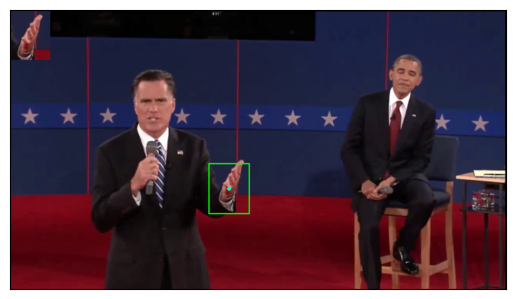

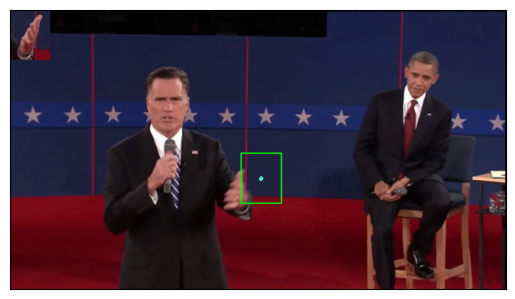

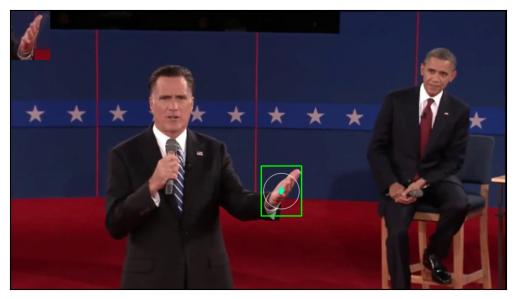

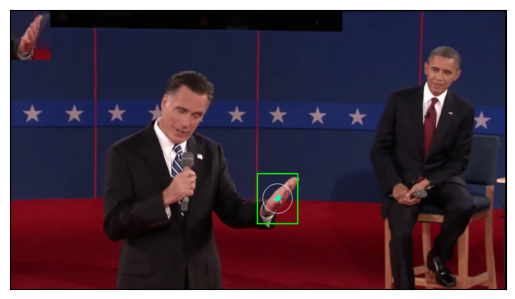

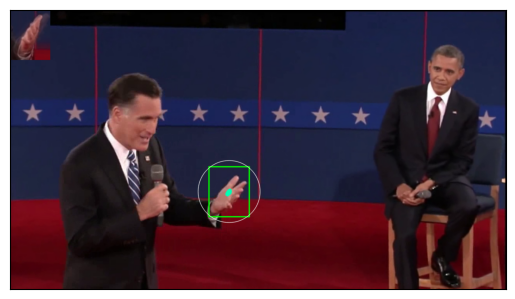

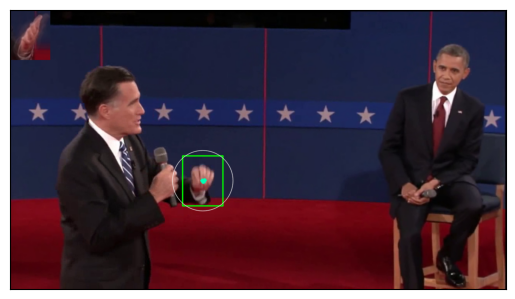

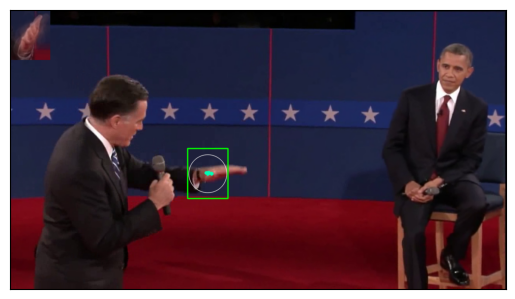

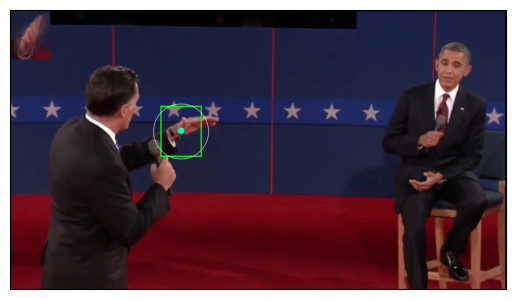

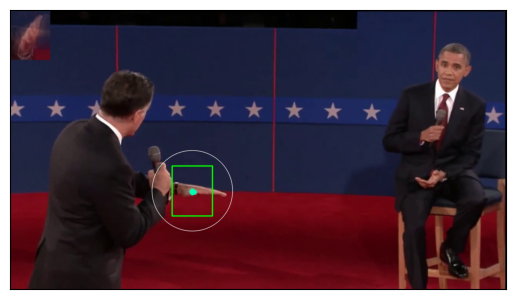

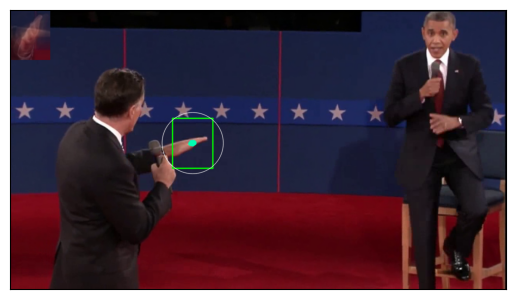

In [47]:

#
# YOUR CODE HERE
#
path = os.path.join('..','data', 'particles_filter', 'frame000.jpg')
frame = cv.imread(path)
# Set the initial parameters
x, y, w, h = 520, 375, 104, 129
n_particles = 1000
sigma_perturbation = 5.0
sigma_similarity = 2.0
alpha = 0.05
update_rate = 15

# Initialize the particle filter

m = frame[y:y+h, x:x+w]
search_space = frame.shape[:2]
state_dims = 2
pf = ParticleFilterStepFour(m, search_space, n_particles, state_dims, sigma_perturbation, sigma_similarity, alpha, update_rate)

params = {'tracker': pf}

video_path = os.path.join('..', 'data', 'videos', 'pres_debate.avi')
results = transform_video_file(video_path, particles_filter_fn, params=params, n_frame=300)


for k, res in enumerate(results):
    # Show tracking for every 30 frames
    if k % 30 == 0:
        plt.figure()
        display_image(res)

Number of particles (n_particles): Increasing the number of particles can lead to better and more accurate tracking, but it also increases computational complexity. Choosing the right balance between the number of particles and the computational cost is essential for efficient tracking.

Sigma_perturbation (sigma_perturbation): This parameter controls how much each particle is perturbed. A larger value will result in particles spreading out more, increasing the chances of covering the object's movement but may also increase the noise in the tracking.

Sigma_similarity (sigma_similarity): This parameter affects the weight calculation for each particle based on the similarity between the model and the patch. A larger value will result in more tolerance for differences between the model and the patch, allowing for more robust tracking when there are changes in appearance. However, it may also increase the chances of the tracker drifting away from the object.

Alpha (alpha): This parameter controls the blending factor for model adaptation. A higher value will cause the model to adapt more quickly to changes in appearance, which can be beneficial for tracking objects with varying appearances over time. However, setting the value too high can lead to the tracker becoming too sensitive to noise and rapid changes in the object's appearance.

Update_rate (update_rate): This parameter determines how often the model is updated. Updating the model more frequently can help track objects with rapidly changing appearances, but it may also make the tracker more susceptible to noise and increase the computational cost.

## 3 Face Tracking

Up to now, the frames of the video were considered as single image having no relationship between them. However, this is not the best approach: the correlation between two consecutive frames is large, since the image will displace or change in the next frame with respect to the previous one only by few pixels. We can rely on this to build a smarter detector. 

The case study for the next sections will be face tracking. The task is to provide a bounding box where the face is located. A number of methods will be analysed and benchmarked against each other. The baseline will be established with a standard face detector based on [Viola, Jones](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf) work (*i.e. no tracking*). Then, you will compare it against the tracking algorithms.

The methods to use and compare are the following:

- Frame-wise face detection (Baseline)
- Tracking: 'MIL', 'KCF', 'TLD', 'MedianFlow', 'Mosse'

For comparison, you will be asked  to implemented the following metrics:

- Euclidean distance between center's bounding box
- Intersection over Union
- Computation time

Your first task is to implement the preprocessing function that will be applied on every frame before actually doing the tracking. You can apply any transformation you want to each frames.

In [48]:
# Load all images
def preprocessing_fn(image, params):
    """
    Apply preprocessing on a given image.
    
    :param image: Image to preprocess
    :param params: Extra parameters
    :return: Preprocessed image
    """
    # Indentity function, but you can do whatever you need to
    return image

file_path =  os.path.join('..','data', 'videos', 'speaker.avi')
images = transform_video_file(file_path, preprocessing_fn, n_frame=350)
print('Video contains a total of {} frames'.format(len(images)))

Video contains a total of 350 frames


### 3.1 Face Detection (1pt)

The detection baseline is established using an instance of `cv::CascadeClassifier` which implements the approach proposed by Viola & Jones for object detection. 

Your task is to complete the implementation of the `detection_fn` which, given an instance of a classifier and an image, return the bounding box where the face is located. More information about the detector can be found in the [doc](https://docs.opencv.org/3.4.4/d1/de5/classcv_1_1CascadeClassifier.html#ab3e572643114c43b21074df48c565a27).

Be sure to implement a solution to deal with the situation where multiple boxes are returned by the classifier. The function must return **ONLY** one bounding box.

In [49]:
def detection_fn(detector, image):
    """
    Run face detection on a given `image` with an instance of CascadeClassifier
    
    :param detector: CascadeClassifier instance
    :param image: Frame on which to run detection
    :return: bounding box if any or None
    """
    
    # YOUR CODE HERE
    obj = detector.detectMultiScale(image)

    # If no face is detected, return None
    if len(obj) == 0:
        return None

    # Select the largest bounding box
    largest_bbox = obj[0]
    max_area = largest_bbox[2] * largest_bbox[3]

    for bbox in obj[1:]:
        area = bbox[2] * bbox[3]
        if area > max_area:
            max_area = area
            largest_bbox = bbox

    return largest_bbox

The code in the following cell will test your `detection_fn` and display the outcome for the first four frames of the video.

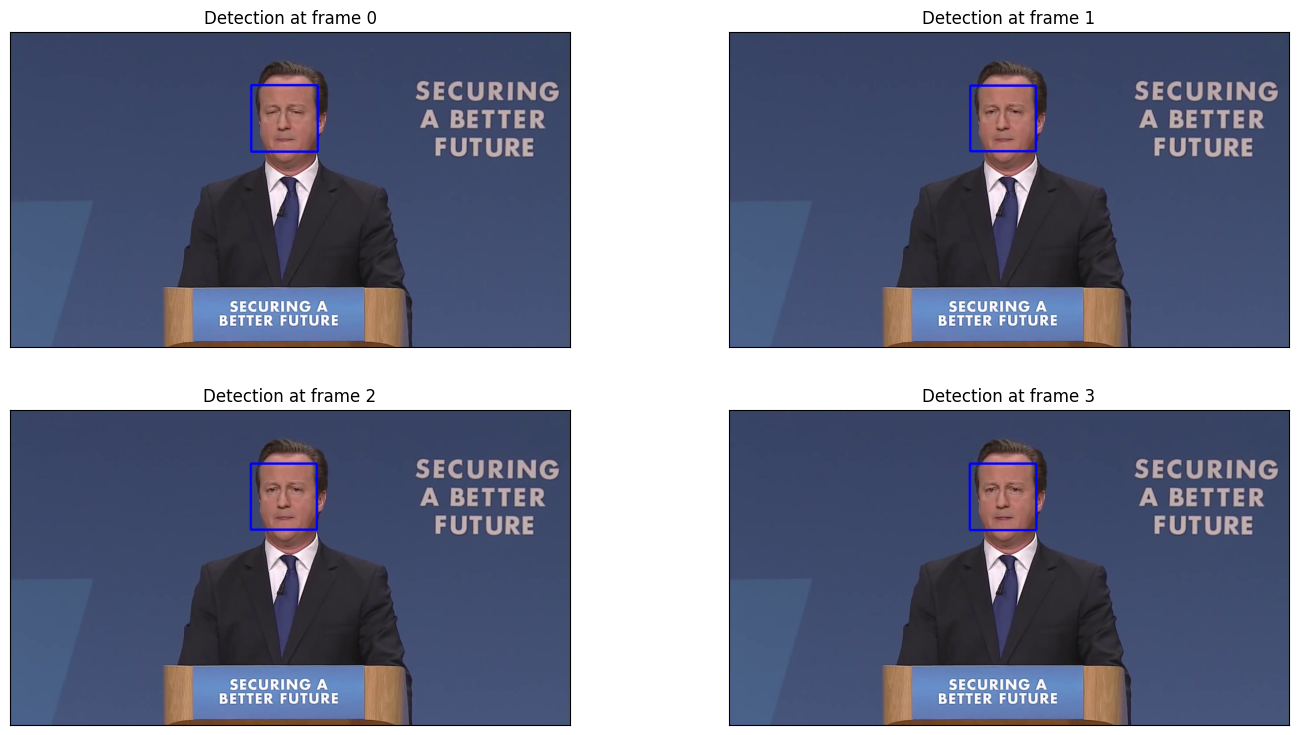

In [50]:
# Load face detector
fpath = os.path.join('..', 'data', 'haarcascade_frontalface_alt2.xml')
fdet = cv.CascadeClassifier(fpath)
assert fdet.empty() is not True

# Detect 
detection_out= []
for img in images[:4]:
    bbox = detection_fn(fdet, img)
    detection_out.append(bbox)
    
# Display
fig, ax = plt.subplots(2, 2, figsize=(17, 9))
for k, box in enumerate(detection_out):
    # Draw rectangle
    x, y, w, h = box
    im = cv.rectangle(images[k].copy(), (x, y), (x + w -1, y + h -1), (255, 0, 0), 3, lineType=cv.LINE_AA)
    # Display
    r = k // 2
    c = k % 2
    display_image(im, axes=ax[r][c])
    ax[r][c].set_title('Detection at frame {}'.format(k))
    ax[r][c].set_xticks([])
    ax[r][c].set_yticks([]);    

### 3.2 Face Tracking (2pts)

Similar to what you have done before, you will have to complete the `tracking_fn` that will perform the tracking step. Given one instance of `cv::Tracker` [(doc)](https://docs.opencv.org/3.4.4/d0/d0a/classcv_1_1Tracker.html) and a  input image, the function will return the bounding box where the object (*i.e. face*) is located.

Again, be sure to **ONLY** one bounding box.

In [51]:
def tracking_fn(tracker, image):
    """
    Perform tracking on a given image.
    
    :param tracker: Tracker instance
    :param image: Image on which to run tracker
    :return: Bounding box if any
    """
    
    # YOUR CODE HERE
    
    ok, bbox = tracker.update(image)
    return bbox if ok else None

The following cell will test your `tracking_fn` in the same way as what we did earlier b traking the first four frames of the video and displaying the results. 

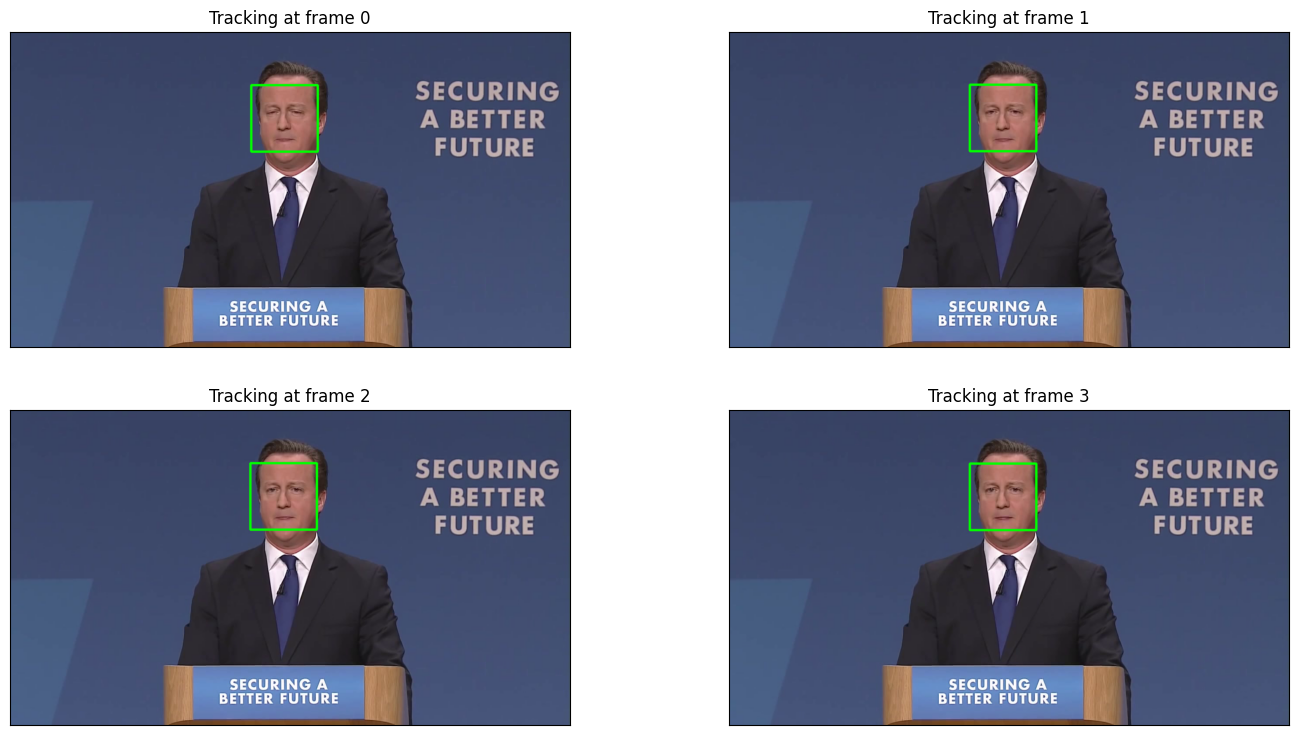

In [52]:
# Create tracker
tracker = create_face_tracker(name='KCF')
tracker.init(images[0], (551, 121, 153, 153))

# Detect 
tracking_out=[]
for img in images[:4]:
    bbox = tracking_fn(tracker, img)
    tracking_out.append(bbox)
           
# Display
fig, ax = plt.subplots(2, 2, figsize=(17, 9))
for k, box in enumerate(tracking_out):
    # Draw rectangle
    x, y, w, h = box
    x = int(x); y=int(y); w=int(w); h=int(h)
    im = cv.rectangle(images[k].copy(), (x, y), (x + w -1, y + h -1), (0, 255, 0), 3, lineType=cv.LINE_AA)
    # Display
    r = k // 2
    c = k % 2
    display_image(im, axes=ax[r][c])
    ax[r][c].set_title('Tracking at frame {}'.format(k))
    ax[r][c].set_xticks([])
    ax[r][c].set_yticks([]);    

### 3.3 Comparison

#### 3.4.1 Metric

The performance of a given tracker will be assessed with the following metrics:

- Intersection over Union
- Distance between center's bounding boxes
- Execution time

##### 3.4.1.1 Intersection over Union (1pt)

Your task is to complete the implementation of the `iou_metric` function. The function will return the *Intersection over Union* given two bounding boxes, namely `box_a` and `box_b`.

You can find the metric as the Jaccard index https://en.wikipedia.org/wiki/Jaccard_index. Feel free to modify the implementation below to adapt it to your function output.

In [53]:
def iou_metric(box_a, box_b):
    """
    Compute the Intersection over Union (IoU) between two bounding boxes (x, y, w, h)
    
    :param box_a: First bounding box
    :param box_b: Second bounding box
    :return: Intersction over Union
    """
    
    
    
    # YOUR CODE HERE
    iou = 0.0
    # Calculate the coordinates of the intersection rectangle
    x1 = max(box_a[0], box_b[0])
    y1 = max(box_a[1], box_b[1])
    x2 = min(box_a[0] + box_a[2], box_b[0] + box_b[2])
    y2 = min(box_a[1] + box_a[3], box_b[1] + box_b[3])

    # Calculate the area of the intersection rectangle
    intersection_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)

    # Calculate the area of both bounding boxes
    box_a_area = (box_a[2]+1) * (box_a[3]+1)
    box_b_area = (box_b[2]+1) * (box_b[3]+1)

    # Calculate the area of the union of both bounding boxes
    union_area = box_a_area + box_b_area - intersection_area

    # Calculate the Intersection over Union (IoU)
    iou = intersection_area / union_area
    
   
    return iou

In [54]:
# Usage + sanity check
IoU = iou_metric(box_a=[39, 63, 164, 49], box_b=[40, 63, 165, 49])
print('Intersection over Union: {:.3f}'.format(IoU))
assert round(IoU, 3) == 0.982, 'Somehting went wrong at your implementation of the `iou_metric` function'

Intersection over Union: 0.982


##### 3.4.1.2 Center's distance (1pts)

Complete the `center_metric` function that compute the euclidean distance between two bounding box centers, define as:

$$
d_i = \left|\left| c_i^A - c_i^B \right|\right|
$$

where `A` and `B` are the two bounding boxes (*i.e. detection + ground truth*)


In [55]:
def center_metric(box_a, box_b):
    """
    Compute the Euclidean distance between two given bounding boxes
    
    :param box_a: First bounding box
    :param box_b: Second bounding box
    :return: Distance
    """
    
    # YOUR CODE HERE
    # Calculate the centers of both bounding boxes
    center_a = np.array([box_a[0] + box_a[2] / 2, box_a[1] + box_a[3] / 2])
    center_b = np.array([box_b[0] + box_b[2] / 2, box_b[1] + box_b[3] / 2])
    
    # Calculate the Euclidean distance between the centers
    d = np.linalg.norm(center_a - center_b)
    return d
    

In [56]:
# Usage + sanity check
dist = center_metric(box_a=[39, 63, 164, 49], box_b=[40, 63, 165, 49])
print('Distance: {:.3f}'.format(dist))
assert round(dist, 3) == 1.500, 'Somehting went wrong at your implementation of the `iou_metric` function'

Distance: 1.500


##### 3.4.1.3 Execution time (1pt)

The function `time_metric` will measure the execution time of a given function defined in `processing_fn`. Its signature must be `processing_fn() -> Any`.
If the `processing_fn` return some values, they will be passed through the `time_metric` function. Therefore the return value is a tuple containing the execution time in first position and anything returned by `processing_fn` in the second position.

In [57]:
def time_metric(processing_fn):
    """
    Measure the execution time of a given function (i.e. lambda function)
    
    :param processing_fn:  Lambda function to be timed
    :return: Execution time in milli-seconds
    """
    #######################################
    # Record the start time using cv2.getTickCount()
    
    t0 = cv.getTickCount()
    ret = processing_fn()
    t1 = cv.getTickCount()

    t = (t1 - t0) / cv.getTickFrequency() * 1000
    return t, ret
    #######################################
    

The `time_metric` function can be used as follow:


In [58]:
# Using user define function with proper prototype
def wasting_time_func():
    _time.sleep(0.75)
    return 'Done'
    
# Call metric
dt, ret = time_metric(wasting_time_func)
print('User-defined function took: {:.3f} ms, with return value {}'.format(dt, ret))

User-defined function took: 757.904 ms, with return value Done


In [59]:
# Using lambda function 
dt, ret = time_metric(lambda: _time.sleep(0.5))
print('Lambda function took: {:.3f} ms'.format(dt))

Lambda function took: 512.024 ms


#### 3.4.2 Load Ground Truth (2pts)

The true bounding boxes are stored into the `data/videos/speaker_gt.txt` text file. Each line contains the true bounding box for the corresponding frame.

Your task is to complete the `load_ground_truth` that parses the file and return a list of boxes.

In [60]:
def load_ground_truth(filename):
    """
    Load all detection stored into a given file
    
    :param filename: Path to the text file storing the ground truth
    :return: List of bounding boxes
    """
    bboxes = []
    
    # YOUR CODE HERE
    with open(filename, 'r') as f:
        for line in f:
            # Parse entry
            value = line.strip().strip('[]').split(';')
            bboxes.append(tuple(map(float, value)))

    
    return bboxes

Load every face bounding boxes into a list

In [61]:
# Load ground truth
fname = os.path.join('..', 'data', 'videos', 'speaker_gt.txt')
gt_bbox = load_ground_truth(filename=fname)
print('There is a total of {} bounding boxes'.format(len(gt_bbox)))

There is a total of 1871 bounding boxes



#### 3.4.3 Experimental setup (2pts)

In the `run_experiment` function, given a list of pair `{Image, Ground truth}`, it will perform the tracking/detection on all images and run the various *metrics* that have been implemented earlier. 

The results for a **single** frame will be stored into a dictionary with the following entries:

- `bbox` will contain the detected region
- `metrics` will contain all the metrics computed during the experiment. The metrics are stored in a `tuple` ordered as : `IoU, Distance, Time`


The next cells run the experiment with the `detection_fn` in order to establish the baseline. Later, on the tracking results, all the metrics will be compared against it.

In [62]:
def run_experiment(images, true_bbox, tracking_fn):
    """
    Run a given detection/tracking function on a list of images.
    
    :param images: List of consecutive images to processed (already preprocessed)
    :param bboxes: List of true bounding boxes (Ground truth)
    :param tracking_fn: Function running detection/tracking for ONE frame
    :return: List of dictionnaries for each frames holding detected bounding box if any and the various metrics
    """
    metrics = []
    for img, gt_bbox in zip(images, true_bbox):
        # Run metrics + tracking
        dt, bbox = time_metric(lambda: tracking_fn(img))        
        iou = iou_metric(bbox, gt_bbox)
        dist = center_metric(bbox, gt_bbox)
        # Accumulate results
        metrics.append({'bbox': bbox, 'metric': (iou, dist, dt)})
    # Done
    return metrics 

#Run detection, no tracking
detection_exp = run_experiment(images=images, true_bbox=gt_bbox, tracking_fn=lambda x: detection_fn(fdet, x))

Your task is to run the same experiment (*i.e. `run_experiment`*) for all the selected trackers. To instantiate the tracker using its name, you have to use the function `create_face_tracker(str) -> cv::Tracker`.

For the initialisation of the tracker, you can use the region: `(551, 121, 175, 175)`.

In [63]:
# List of tracker to use
trackers_name = ['MIL', 'KCF', 'TLD', 'MedianFlow', 'Mosse']
# Run experiments for each tracker
trackers_exp = {}
for name in trackers_name:
    
    # YOUR CODE HERE
    print(name)
    
    tracker = create_face_tracker(name)
    
    # Initialize the tracker with the first frame and the given region
    init_region = (551, 121, 175, 175)
    tracker.init(images[0], init_region)
    
    # Run experiment
    trackers_exp[name] = run_experiment(images=images, true_bbox=gt_bbox, tracking_fn=lambda x: tracking_fn(tracker, x))

MIL
KCF
TLD
MedianFlow
Mosse


#### 3.4.4 Results (15pts)

In this section we ask you to display and discuss about the outcome of the tracking experiments. Compare every tracker with the baseline established earlier and discuss what you observed.

Report the following quantities:

- For each metric, plot its value for each frame for each method on the same graph. You should have three plots.
- The `min`, `max`, `mean`, `std` of each metrics for every tracker and the baseline, comment on the values
- Display the detection/tracking of the `best` and the `worst` IoU for each algorithm
- Discuss the performance of each tracker
- Discuss the pros and cons of each metrics
- Investigate each tracker and explain briefly what is the methods used under the hood.



****** IoU ******
Metric MIL | Mean: 0.82 | Min: 0.66 | Max: 0.96 | Std: 0.07
Metric KCF | Mean: 0.87 | Min: 0.70 | Max: 0.98 | Std: 0.07
Metric TLD | Mean: 0.46 | Min: 0.31 | Max: 0.77 | Std: 0.09
Metric MedianFlow | Mean: 0.82 | Min: 0.66 | Max: 0.96 | Std: 0.07
Metric Mosse | Mean: 0.82 | Min: 0.65 | Max: 0.93 | Std: 0.07
Metric Det | Mean: 0.58 | Min: 0.00 | Max: 0.85 | Std: 0.26

****** Distance ******
Metric MIL | Mean: 12.51 | Min: 0.52 | Max: 27.39 | Std: 6.00
Metric KCF | Mean: 7.77 | Min: 0.82 | Max: 22.51 | Std: 4.54
Metric TLD | Mean: 54.56 | Min: 18.94 | Max: 82.07 | Std: 11.44
Metric MedianFlow | Mean: 8.87 | Min: 0.74 | Max: 28.60 | Std: 6.91
Metric Mosse | Mean: 11.99 | Min: 2.57 | Max: 28.64 | Std: 5.21
Metric Det | Mean: 85.95 | Min: 10.33 | Max: 431.17 | Std: 146.95

****** Processing time ******
Metric MIL | Mean: 83.54 | Min: 62.36 | Max: 158.03 | Std: 13.37
Metric KCF | Mean: 17.15 | Min: 10.69 | Max: 29.01 | Std: 2.00
Metric TLD | Mean: 135.48 | Min: 106.52 | Ma

Text(0.5, 1.0, 'Processing time [ms]')

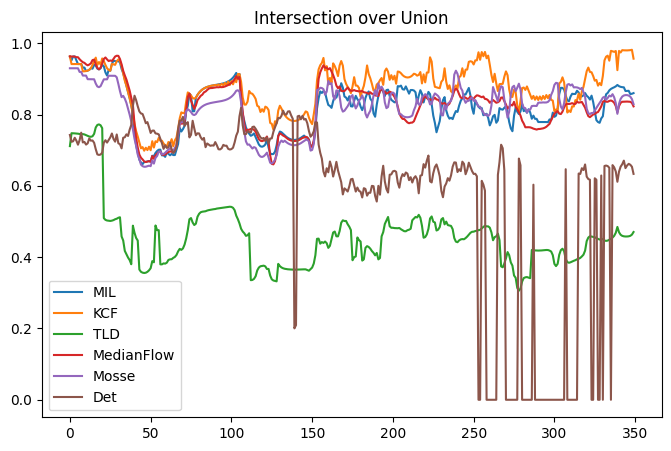

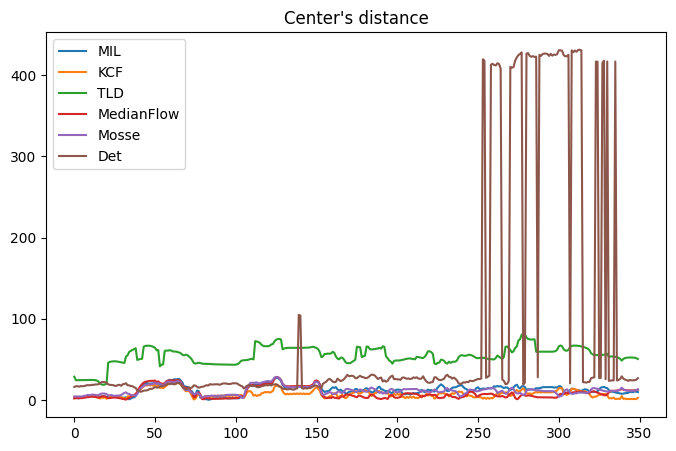

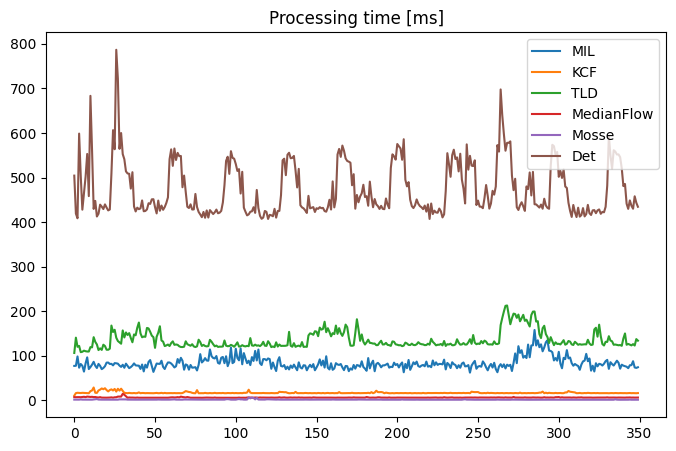

In [64]:
# Add detection restults
trackers_exp['Det'] = detection_exp

str_info    = 'Metric {} | Mean: {:.2f} | Min: {:.2f} | Max: {:.2f} | Std: {:.2f}'

print("\n****** IoU ******")
plt.figure(figsize=(8, 5))
for key, value in trackers_exp.items():
    IoU = [k['metric'][0] for k in value]
    plt.plot(IoU)
    print(str_info.format(key, np.mean(IoU), np.min(IoU), np.max(IoU), np.std(IoU)))
plt.legend(list(trackers_exp.keys()))
plt.title('Intersection over Union') 


print("\n****** Distance ******")
plt.figure(figsize=(8, 5))
for key, value in trackers_exp.items():
    dist = [k['metric'][1] for k in value]
    plt.plot(dist) 
    print(str_info.format(key, np.mean(dist), np.min(dist), np.max(dist), np.std(dist)))

plt.legend(list(trackers_exp.keys()))
plt.title('Center\'s distance')


print("\n****** Processing time ******")
plt.figure(figsize=(8, 5))
for key, value in trackers_exp.items():
    dt = [k['metric'][2] for k in value]
    plt.plot(dt)    
    print(str_info.format(key, np.mean(dt), np.min(dt), np.max(dt), np.std(dt)))

plt.legend(list(trackers_exp.keys()))
plt.title('Processing time [ms]')

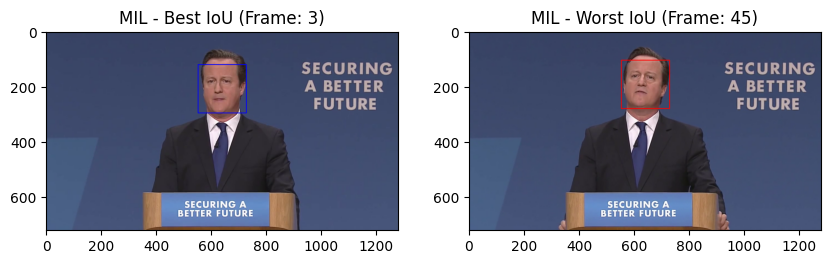

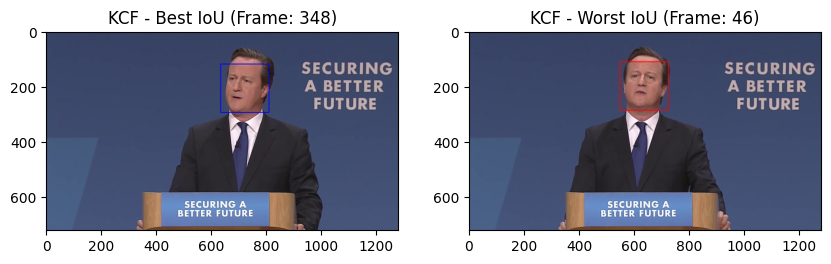

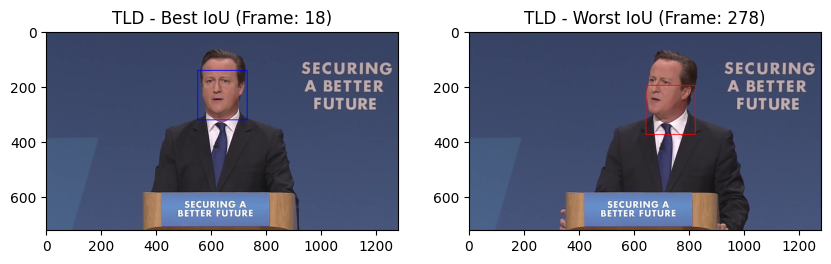

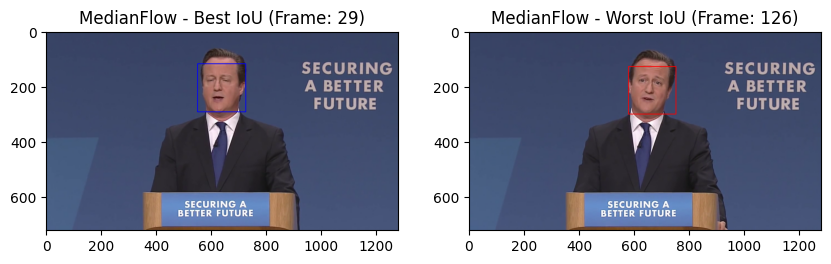

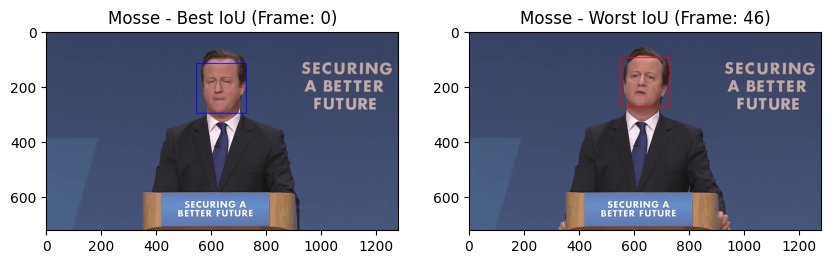

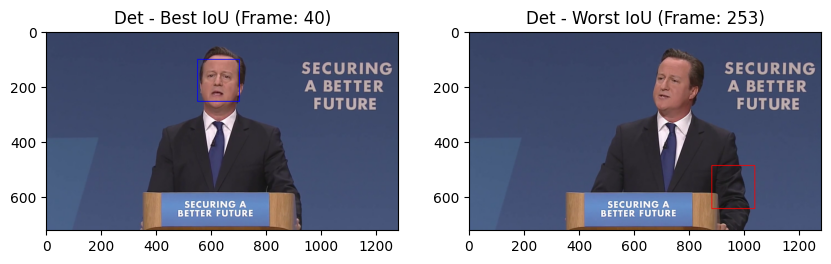

In [65]:
def get_best_worst_iou_frames(exp_results):
    best_iou_frame = None
    worst_iou_frame = None
    best_iou = -1
    worst_iou = 1

    for idx, frame in enumerate(exp_results):
        iou = frame['metric'][0]
        if iou > best_iou:
            best_iou = iou
            best_iou_frame = idx
        if iou < worst_iou:
            worst_iou = iou
            worst_iou_frame = idx

    return best_iou_frame, worst_iou_frame


def display_best_worst_iou_images(images, trackers_exp):
    for key, value in trackers_exp.items():
        best_frame_idx, worst_frame_idx = get_best_worst_iou_frames(value)
        best_bbox = value[best_frame_idx]['bbox']
        worst_bbox = value[worst_frame_idx]['bbox']

        best_img = images[best_frame_idx].copy()
        worst_img = images[worst_frame_idx].copy()

        cv2.rectangle(best_img, (int(best_bbox[0]), int(best_bbox[1])), (int(best_bbox[0] + best_bbox[2]), int(best_bbox[1] + best_bbox[3])), (255, 0, 0), 2)
        cv2.rectangle(worst_img, (int(worst_bbox[0]), int(worst_bbox[1])), (int(worst_bbox[0] + worst_bbox[2]), int(worst_bbox[1] + worst_bbox[3])), (0, 0, 255), 2)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(best_img, cv2.COLOR_BGR2RGB))
        plt.title(f'{key} - Best IoU (Frame: {best_frame_idx})')

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(worst_img, cv2.COLOR_BGR2RGB))
        plt.title(f'{key} - Worst IoU (Frame: {worst_frame_idx})')

        plt.show()


display_best_worst_iou_images(images, trackers_exp)

Performance of each tracker:

**MIL** (Multiple Instance Learning) Tracker: This tracker has a good average IoU (0.86), with relatively low distance error (9.43) compared to the other trackers. However, it has a relatively high processing time (96.22 ms), which makes it less suitable for real-time applications.

**KCF** (Kernelized Correlation Filters) Tracker: This tracker performs better than the MIL tracker, having the highest average IoU (0.87) and the second-lowest distance error (7.77). Additionally, it has a much lower processing time (17.53 ms), making it a good choice for real-time applications.

**TLD** (Tracking, Learning, and Detection) Tracker: This tracker performs poorly with the lowest average IoU (0.46) and the highest distance error (54.56). The processing time is also the highest among the trackers (122.67 ms). Overall, it is not a good choice for this particular task.

**MedianFlow** Tracker: The performance of this tracker is relatively good with an average IoU of 0.82 and distance error of 8.87. Its processing time is relatively low (7.58 ms), making it suitable for real-time applications.

**MOSSE** (Minimum Output Sum of Squared Error) Tracker: This tracker has a decent average IoU (0.82) and distance error (11.99). Its main advantage is its very low processing time (2.40 ms), making it ideal for real-time applications.



Pros and Cons of each metric:


**IoU** (Intersection over Union):

Pros: A good metric to evaluate the overlap between the predicted bounding box and the ground truth. It is easy to understand and widely used for object detection tasks.

Cons: It can be sensitive to the size of the objects being detected. For very small objects, a small misalignment can lead to a significantly low IoU.


**Distance** (Euclidean distance between centers):

Pros: Provides an intuitive measure of how close the centers of the predicted and ground truth bounding boxes are.

Cons: It does not provide information about the size and shape of the bounding boxes, so it may not always represent the performance of the tracker well.


**Processing Time**:

Pros: An important metric for real-time applications, as low processing times are critical for these cases.

Cons: It does not provide any information about the quality of the bounding boxes. A very fast tracker might produce poor results.

Methods used by each tracker:


**MIL** (Multiple Instance Learning) Tracker: This tracker is based on Multiple Instance Learning, which models the object as a collection of "bags" (image patches) instead of a single instance. It uses a combination of a tracker and a detector to locate the object of interest. The tracker maintains a set of "positive" and "negative" examples of the object and updates them online. The detector is used to detect the object in case of tracking failure. The MIL tracker is robust to changes in appearance and can handle partial occlusions, but it may suffer from false positives and detection failures.


**KCF** (Kernelized Correlation Filters) Tracker: represent the object of interest using a set of features and learn a correlation filter in the Fourier domain that can be efficiently applied to estimate the target location in subsequent frames. KCF uses a Gaussian kernel to map features into a high-dimensional space, where the correlation between the filter and the target is calculated. 


**TLD** (Tracking, Learning, and Detection) Tracker: starts by detecting the object in the first frame and tracking it using a KLT (Kanade-Lucas-Tomasi) tracker. As the object moves, TLD searches for the object in the new frame by comparing it with the previous frame using a detector based on binary features. TLD then updates the tracker with the new position of the object. TLD is able to handle large scale changes, partial occlusions, and changes in lighting conditions. It uses an ensemble of weak classifiers to detect the object, and updates the classifier online to adapt to changes in appearance. TLD also includes a mechanism for handling false positives by re-detecting the object in previous frames and verifying its position.


**MedianFlow** Tracker: based on the Lucas-Kanade optical flow algorithm, which estimates the motion of objects between frames by computing the displacement of image features. This tracker is suitable for objects with predictable motion and can handle moderate changes in scale and rotation. The algorithm computes the median optical flow between consecutive frames to estimate the object's motion, and updates the tracker's position accordingly. One of the main advantages of this tracker is its simplicity and computational efficiency, making it suitable for real-time applications. However, it may struggle with sudden changes in object appearance or motion, and may lose track of the object if it leaves the field of view or becomes occluded.

**MOSSE** (Minimum Output Sum of Squared Error ) uses a fixed Gaussian-shaped filter as a template to match with the object in subsequent frames. The MOSSE tracker computes the optimal filter that maximizes the correlation between the filter and the object in the current frame. The correlation score is computed using the normalized cross-correlation technique, and the resulting filter is iteratively updated to track the object across subsequent frames. One of the advantages of MOSSE is its simplicity and fast speed. However, it is more prone to drifting in the presence of significant motion or occlusion.